In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
p = Path("C:/Users/k/Desktop/GitHub/GPS_transport/")

aug_data = pd.read_hdf(p / "processed_data" / "aug_all.h5", key="aug")
segments = pd.read_csv(p / "input_data" / "python" / "segments.csv")
markers = pd.read_csv(p / "input_data" / "python" / "markers.csv")

In [3]:
aug_data = aug_data.loc[:,["segment_id" , "aug_time", "speed"]]
aug_data = aug_data.dropna(subset=["speed"])
aug_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25435205 entries, 0 to 533346
Data columns (total 3 columns):
 #   Column      Non-Null Count     Dtype         
---  ------      --------------     -----         
 0   segment_id  25435205 non-null  uint16        
 1   aug_time    25435205 non-null  datetime64[ns]
 2   speed       25435205 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint16(1)
memory usage: 630.7 MB


In [4]:
selected_segment_id = np.arange(48,67)
print(f"selected segments are:{selected_segment_id}")
aug_data = aug_data.loc[aug_data["segment_id"].isin(selected_segment_id), ["aug_time","speed","segment_id"]]
aug_data = aug_data.sort_values(["segment_id", "aug_time"]).reset_index(drop=True)

selected segments are:[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]


In [5]:
aug_data.loc[aug_data["segment_id"] == selected_segment_id[0]].set_index("aug_time").loc["2019-12-03 19:00:00" : "2019-12-03 23:00:00"]

speed  segment_id
aug_time                                             
2019-12-03 19:01:05.561367989   42.424697          48
2019-12-03 19:01:40.696727753   51.346283          48
2019-12-03 19:01:54.362637997  101.531136          48
2019-12-03 19:02:15.494381905   68.378459          48
2019-12-03 19:02:56.446246624   65.080097          48
...                                   ...         ...
2019-12-03 22:47:51.394933701   27.845152          48
2019-12-03 22:50:37.683194160   97.532219          48
2019-12-03 22:55:29.554464817  115.208906          48
2019-12-03 22:56:52.703099251   72.637036          48
2019-12-03 22:57:39.614307880   51.771476          48

[216 rows x 2 columns]

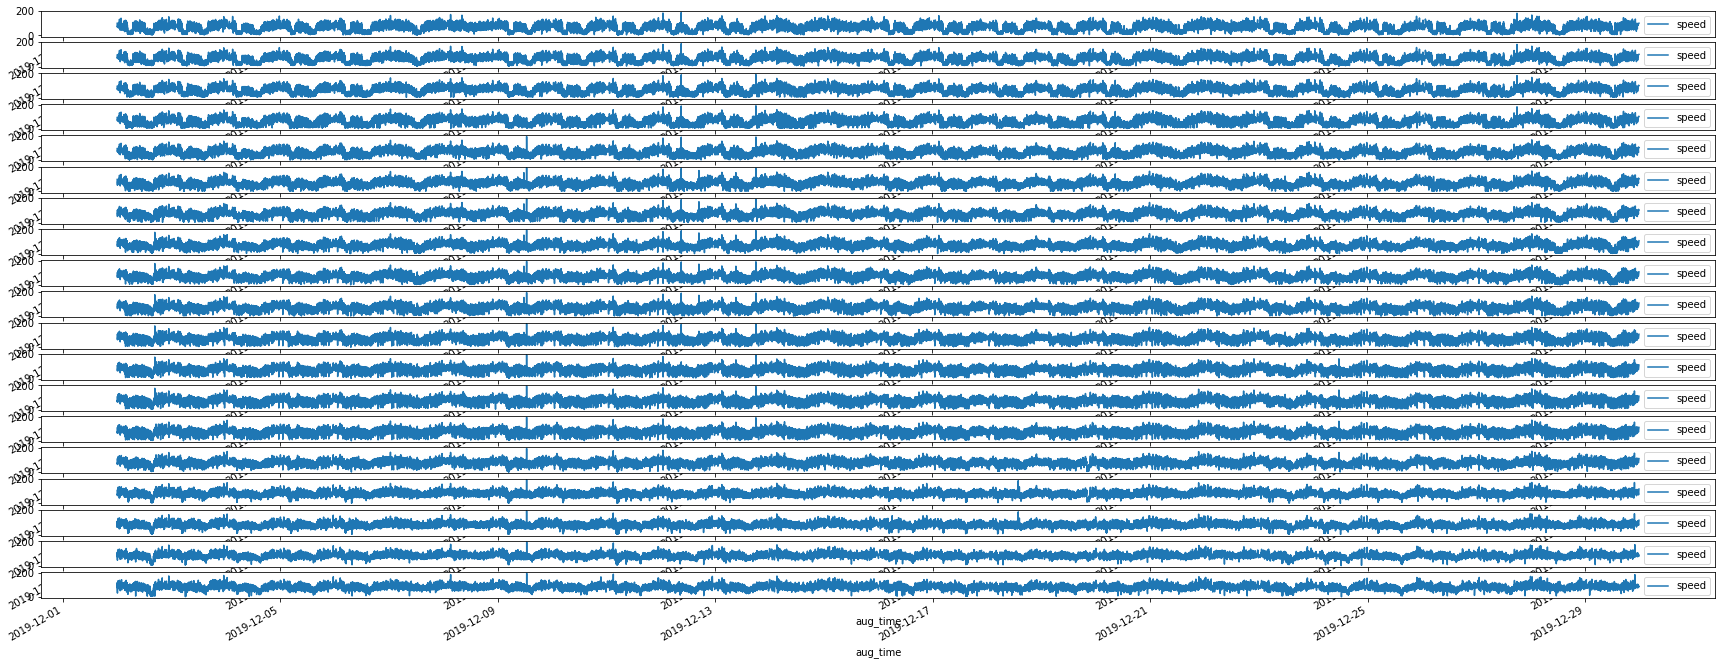

In [6]:
nrows = len(selected_segment_id)

fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[aug_data["segment_id"] == selected_segment_id[i]].set_index("aug_time").plot(ax=ax, y="speed");

In [7]:
# for s_id in selected_segment_id:
#     stationary_check = sm.tsa.stattools.adfuller(aug_data.loc[aug_data["segment_id"] == s_id,"speed"])
#     print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

In [7]:
time_bin = "30T"
aug_data = aug_data.groupby("segment_id").apply(lambda x: x.set_index("aug_time").resample(time_bin)["speed"].mean())
aug_data = aug_data.T
aug_data = aug_data.reset_index()
# aug_data = aug_data.unstack(0)

In [8]:
names = ([f"segment_{i}" for i in selected_segment_id])
names.insert(0, "aug_time")
# names.append("int_based")
aug_data.columns = names

In [9]:
aug_data

aug_time  segment_48  segment_49  segment_50  segment_51  \
0    2019-12-02 00:00:00   81.537045   80.626640   79.737036   80.507055   
1    2019-12-02 00:30:00   81.914738   81.800427   83.905721   84.906376   
2    2019-12-02 01:00:00   83.477050   83.296162   82.864323   83.082706   
3    2019-12-02 01:30:00   96.528832   96.076008   93.111836   92.375866   
4    2019-12-02 02:00:00   77.797842   79.047852   80.818089   80.602027   
...                  ...         ...         ...         ...         ...   
1339 2019-12-29 21:30:00   75.077524   74.988244   72.239341   71.120478   
1340 2019-12-29 22:00:00   96.199798   94.825678   94.155333   92.707085   
1341 2019-12-29 22:30:00   74.892161   79.857025   80.435107   81.042385   
1342 2019-12-29 23:00:00   84.929734   80.483866   80.744035   82.197238   
1343 2019-12-29 23:30:00   93.428222   94.621566   95.767292   96.113116   

      segment_52  segment_53  segment_54  segment_55  segment_56  segment_57  \
0      81.167461   79.508472   79.878024   81.010455   81.468223   82.848875   
1      86.521198   87.459270   91.071794   92.346953   93.072212   93.139695   
2      79.915920   81.579868   83.443065   83.813470   84.665177   85.209129   
3      93.601568   90.688855   90.558364   91.733214   93.340960   94.831743   
4      78.586402   79.458945   81.681910   83.305114   84.675584   85.718606   
...          ...         ...         ...         ...         ...         ...   
1339   70.723484   72.095004   73.587755   76.320613   76.912359   77.171518   
1340   91.723730   89.110562   88.922839   90.055619   91.641471   91.102359   
1341   81.434598   84.158191   86.042787   86.322659   86.782205   91.390202   
1342   77.819009   79.614151   80.550416   82.817197   84.742042   84.263905   
1343   88.924322   90.328905   91.146352   87.343421   87.449437   87.289809   

      segment_58  segment_59  segment_60  segment_61  segment_62  segment_63  \
0      83.752321   84.476510   83.521218   83.675029   83.935074   84.151601   
1      92.304122   95.605906   93.824305   93.120637   93.142722   90.105069   
2      85.739420   86.169920   86.219027   86.176731   86.917410   88.770794   
3      96.078422   96.669147   97.118374   97.178782   98.357765   99.397759   
4      86.706565   87.053207   87.215280   87.162122   86.905128   87.394187   
...          ...         ...         ...         ...         ...         ...   
1339   77.766487   79.449268   79.404247   79.674574   81.117660   82.091941   
1340   91.123659   90.406184   88.362756   88.415661   90.807408   92.145665   
1341   92.633437   87.837589   87.200251   86.727156   86.169798   84.761746   
1342   86.828976   92.161688   92.296862   91.254329   92.922586   95.230696   
1343   87.810222   89.031983   89.476968   90.167928   91.405935   89.820244   

      segment_64  segment_65  segment_66  
0      82.891664   84.956570   80.792269  
1      92.179962  103.294689  103.229976  
2      89.509159   91.288778   90.772966  
3      97.351149  102.112012  102.693277  
4      86.052027   84.830869   85.029726  
...          ...         ...         ...  
1339   83.026379   96.462904   96.785610  
1340   92.499845   93.283833   92.018502  
1341   84.461913   77.776770   77.881324  
1342   95.419944   93.900627   91.209314  
1343   92.251926   85.081598   86.223925  

[1344 rows x 20 columns]

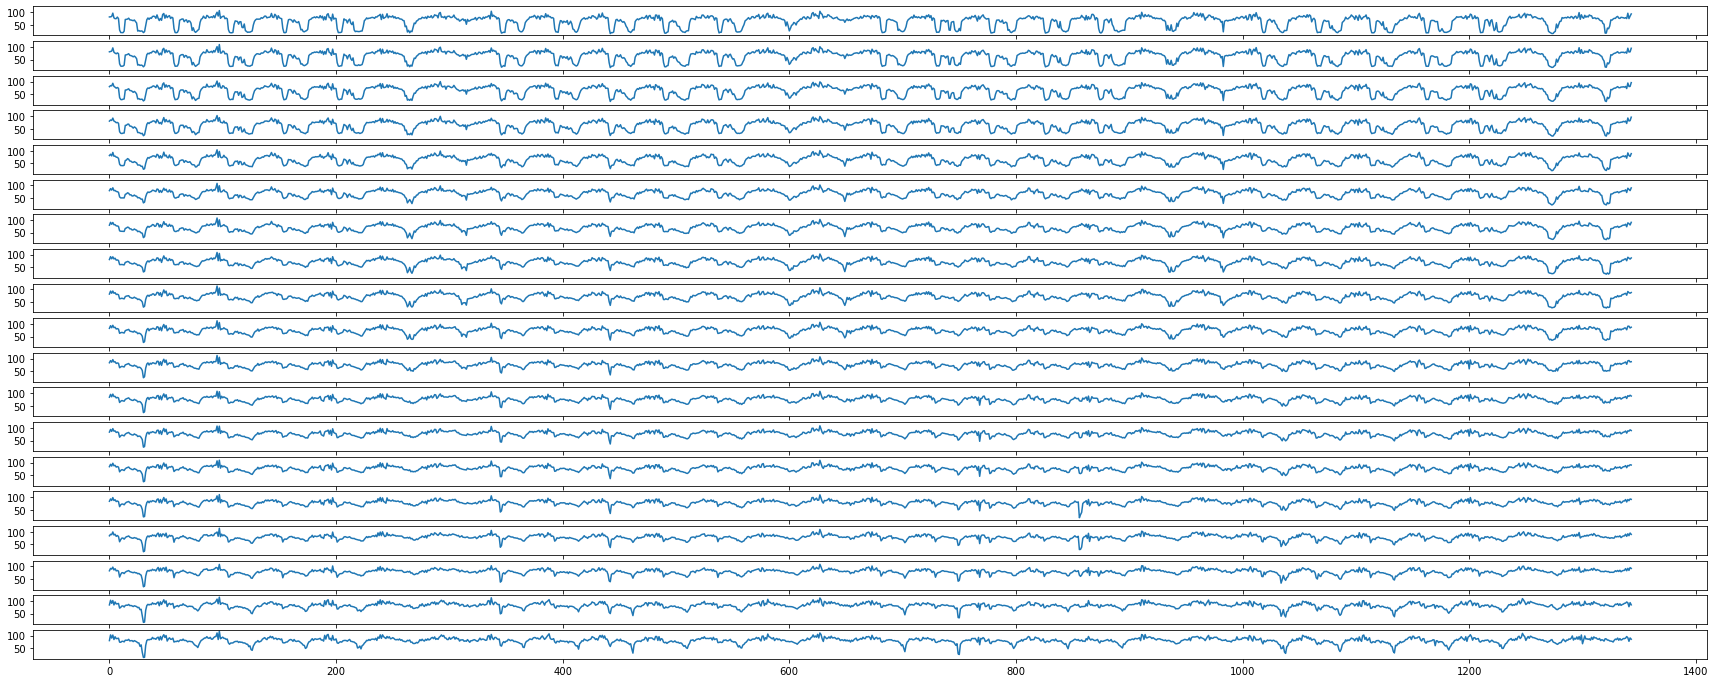

In [11]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax, y="speed");

In [12]:
aug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   aug_time    1344 non-null   datetime64[ns]
 1   segment_48  1344 non-null   float64       
 2   segment_49  1344 non-null   float64       
 3   segment_50  1344 non-null   float64       
 4   segment_51  1344 non-null   float64       
 5   segment_52  1344 non-null   float64       
 6   segment_53  1344 non-null   float64       
 7   segment_54  1344 non-null   float64       
 8   segment_55  1344 non-null   float64       
 9   segment_56  1344 non-null   float64       
 10  segment_57  1344 non-null   float64       
 11  segment_58  1344 non-null   float64       
 12  segment_59  1344 non-null   float64       
 13  segment_60  1344 non-null   float64       
 14  segment_61  1344 non-null   float64       
 15  segment_62  1344 non-null   float64       
 16  segment_63  1344 non-nul

### Segment located in front of ODTU is selected (dir = 2, polatli > ankara)

### Stationary check
#### (p value < significance level) --> reject stationay --> the series is non-stationary

### Agregation on time bins & NaNs

In [13]:
time_1 = dt.time.fromisoformat("20:00:00")
time_2 = dt.time.fromisoformat("06:00:00")
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.time > time_1) | (aug_data["aug_time"].dt.time < time_2))]
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.weekday == 6) | (aug_data["aug_time"].dt.weekday == 5))]

In [14]:
# aug_data["int_based"] = np.arange(0,len(aug_data))
# aug_data = aug_data.reset_index()
aug_data = aug_data.reset_index(drop=True)
print(aug_data.info())
print(aug_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   aug_time    580 non-null    datetime64[ns]
 1   segment_48  580 non-null    float64       
 2   segment_49  580 non-null    float64       
 3   segment_50  580 non-null    float64       
 4   segment_51  580 non-null    float64       
 5   segment_52  580 non-null    float64       
 6   segment_53  580 non-null    float64       
 7   segment_54  580 non-null    float64       
 8   segment_55  580 non-null    float64       
 9   segment_56  580 non-null    float64       
 10  segment_57  580 non-null    float64       
 11  segment_58  580 non-null    float64       
 12  segment_59  580 non-null    float64       
 13  segment_60  580 non-null    float64       
 14  segment_61  580 non-null    float64       
 15  segment_62  580 non-null    float64       
 16  segment_63  580 non-null  

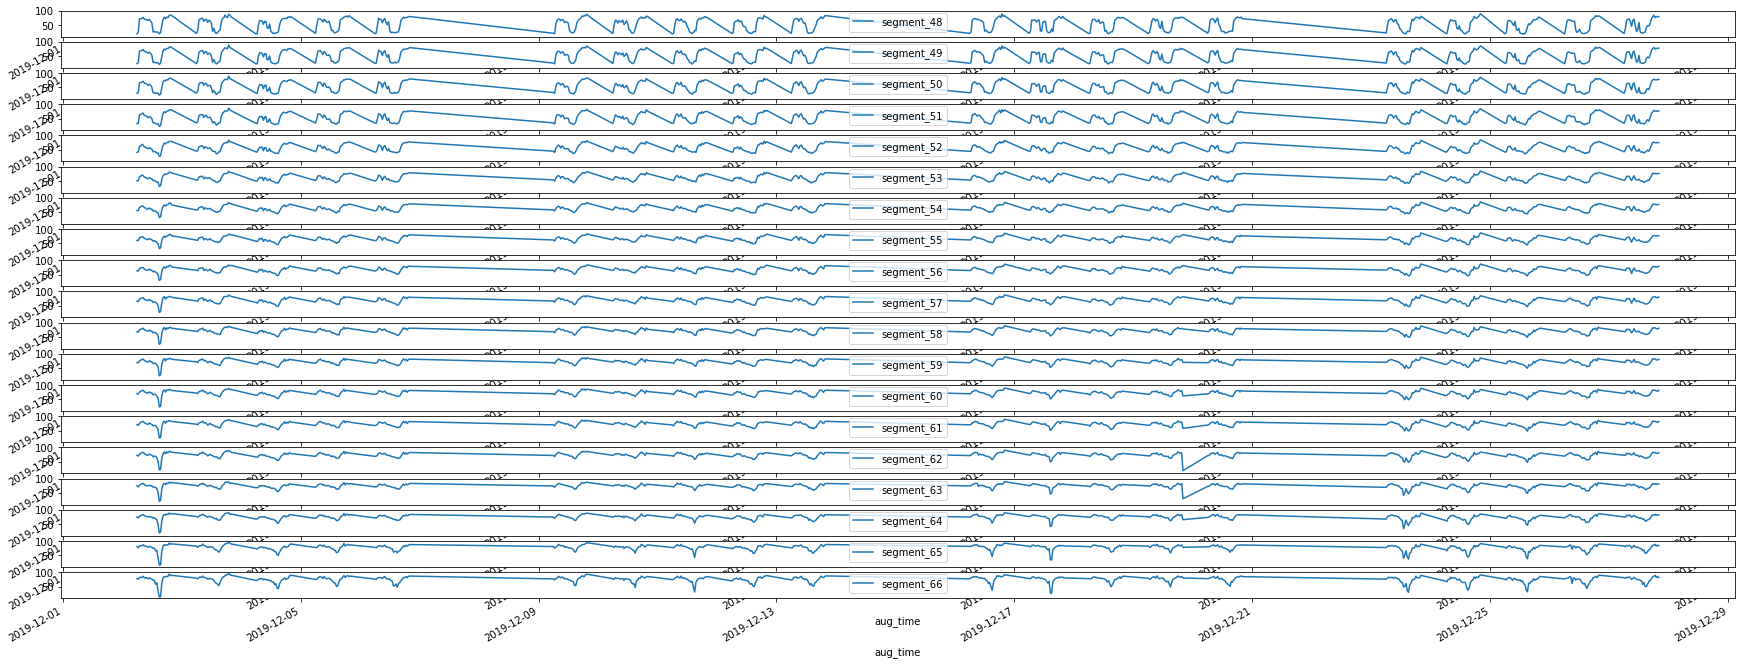

In [15]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data.loc[:, [f"segment_{i}", "aug_time"] ].plot(ax=ax, x="aug_time");

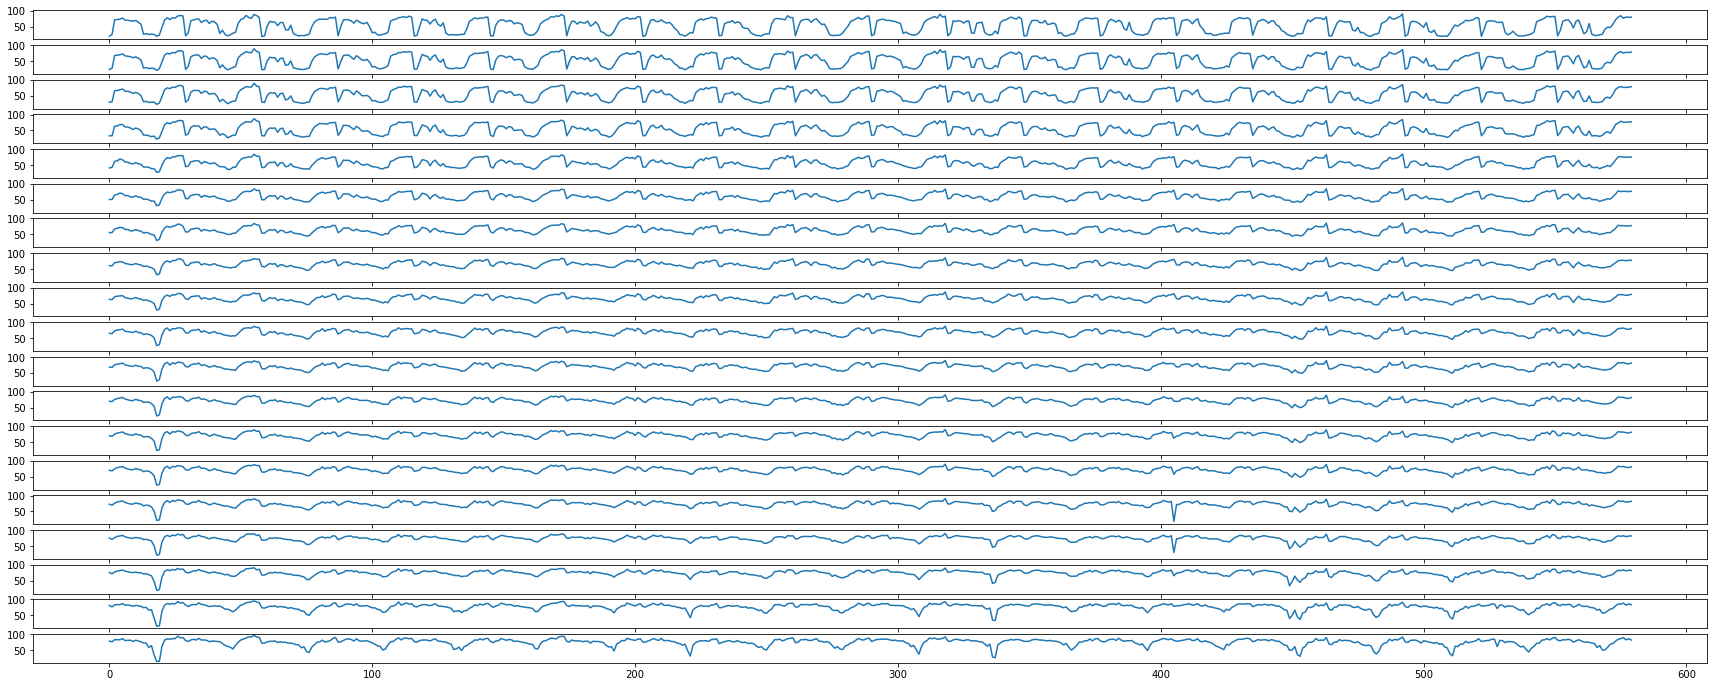

In [16]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [20]:
# print(aug_data.loc[aug_data.isna().sum(axis=1) > 1])
aug_data.isna().sum()


aug_time      0
segment_48    0
segment_49    0
segment_50    0
segment_51    0
segment_52    0
segment_53    0
segment_54    0
segment_55    0
segment_56    0
segment_57    0
segment_58    0
segment_59    0
segment_60    0
segment_61    0
segment_62    0
segment_63    0
segment_64    0
segment_65    0
segment_66    0
dtype: int64

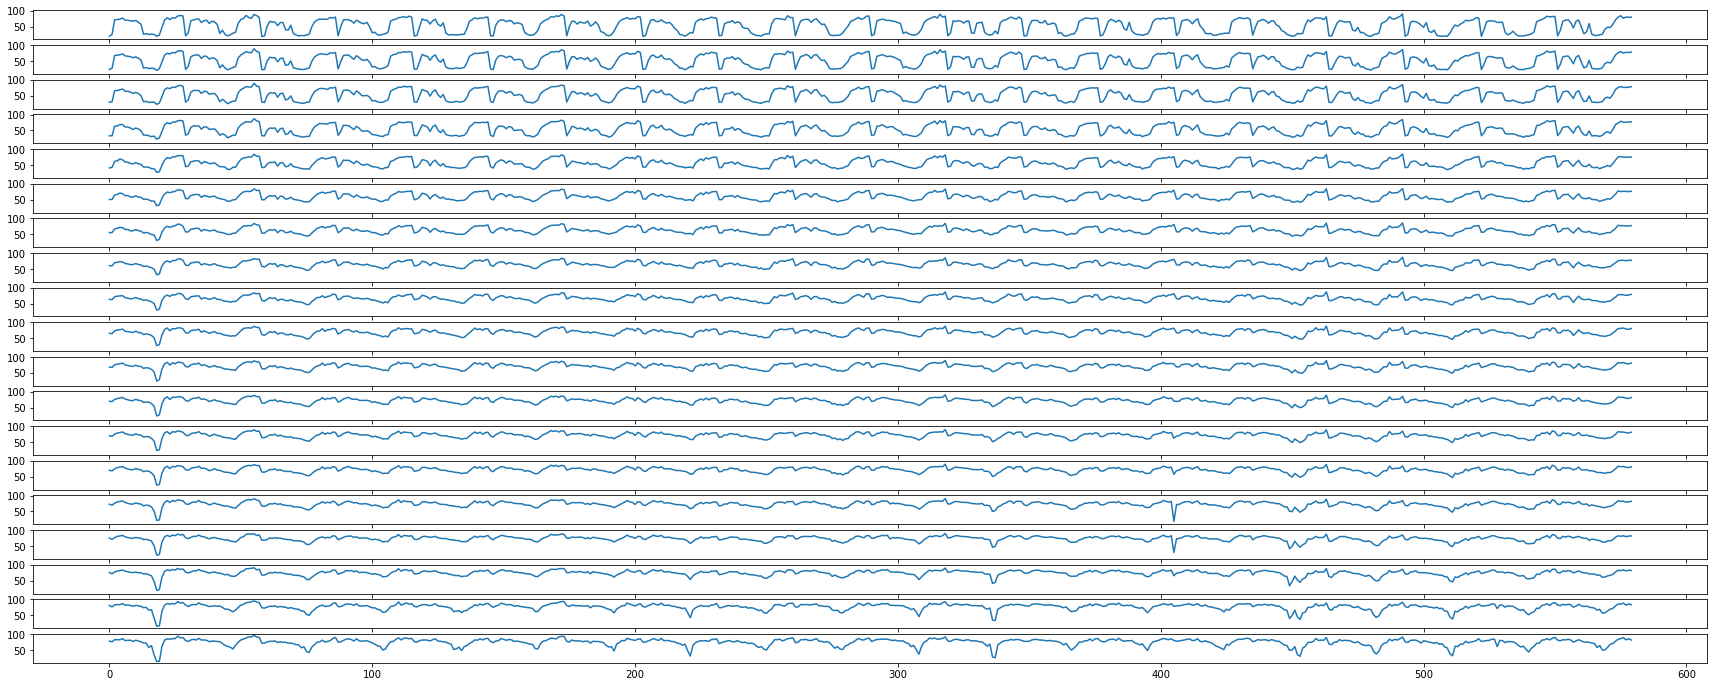

In [21]:
# no need
# aug_data = aug_data.fillna(method="bfill").fillna(method="ffill")
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [22]:
for s_id in selected_segment_id:
    stationary_check = sm.tsa.stattools.adfuller(aug_data[f"segment_{s_id}"])
    print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

p value is 4.1963634786537426e-22, segment_id = 48 
p value is 1.3784872493245676e-22, segment_id = 49 
p value is 2.6010358819172743e-23, segment_id = 50 
p value is 4.643672519141227e-24, segment_id = 51 
p value is 2.5851193053102745e-24, segment_id = 52 
p value is 1.2686751878321577e-23, segment_id = 53 
p value is 8.85846421557003e-23, segment_id = 54 
p value is 7.735564237481768e-21, segment_id = 55 
p value is 4.875365655051299e-19, segment_id = 56 
p value is 7.512357254524304e-20, segment_id = 57 
p value is 1.7865577433561653e-18, segment_id = 58 
p value is 1.299685879377857e-17, segment_id = 59 
p value is 1.3853615229568206e-17, segment_id = 60 
p value is 2.571987412122566e-17, segment_id = 61 
p value is 2.704384204918105e-16, segment_id = 62 
p value is 1.1915074405814214e-14, segment_id = 63 
p value is 1.4181684864918855e-15, segment_id = 64 
p value is 2.5025968543712347e-15, segment_id = 65 
p value is 3.533283834674247e-18, segment_id = 66 


### Discarding weekend days

#### bir gün 91 datapoint

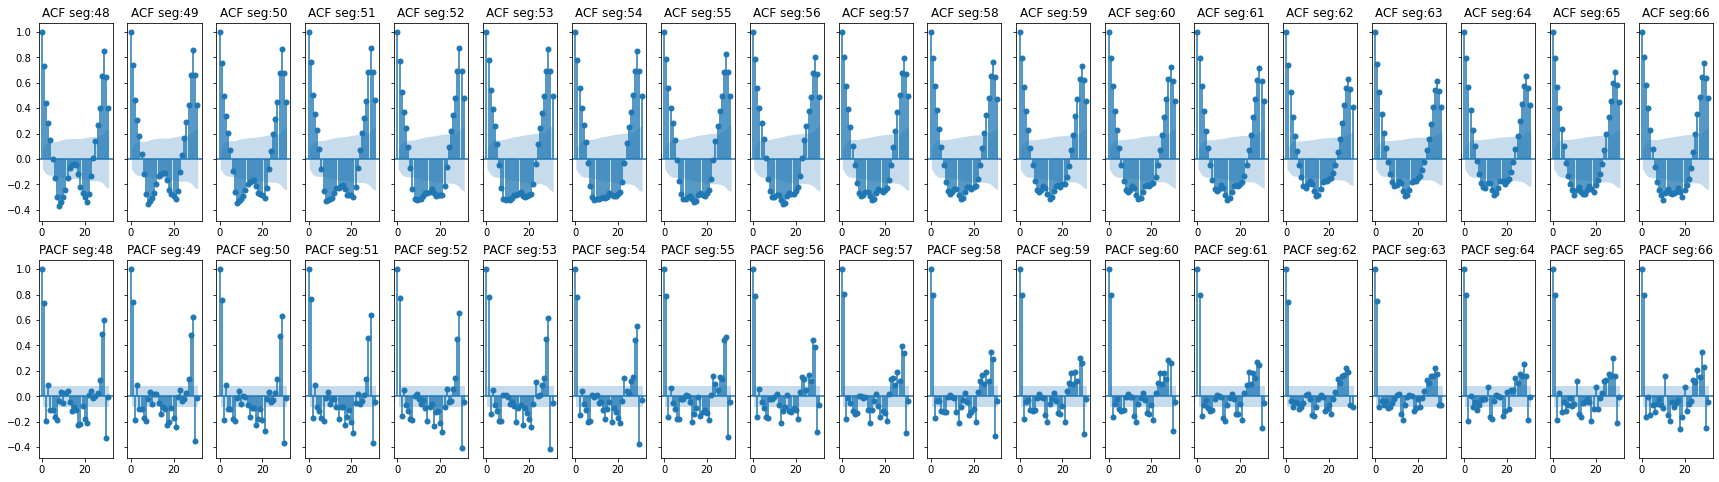

In [23]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"], lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"], lags=lags, ax=ax2, title=f"PACF seg:{i}");

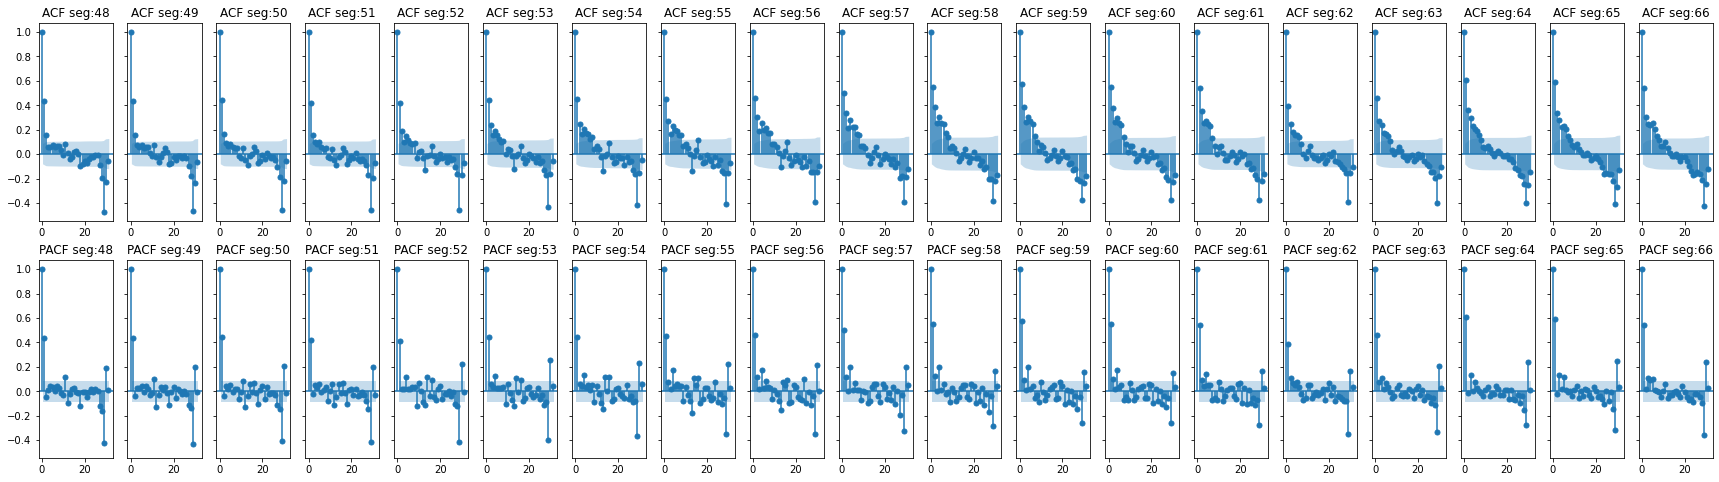

In [24]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff(29).dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff(29).dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

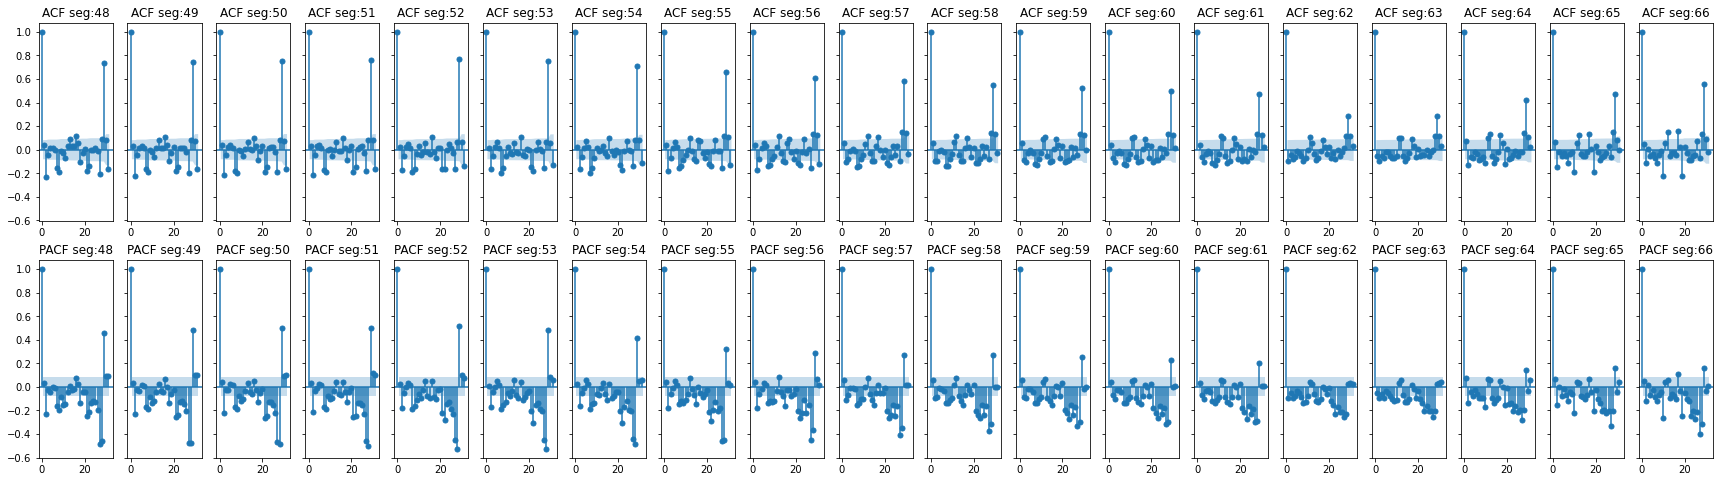

In [25]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

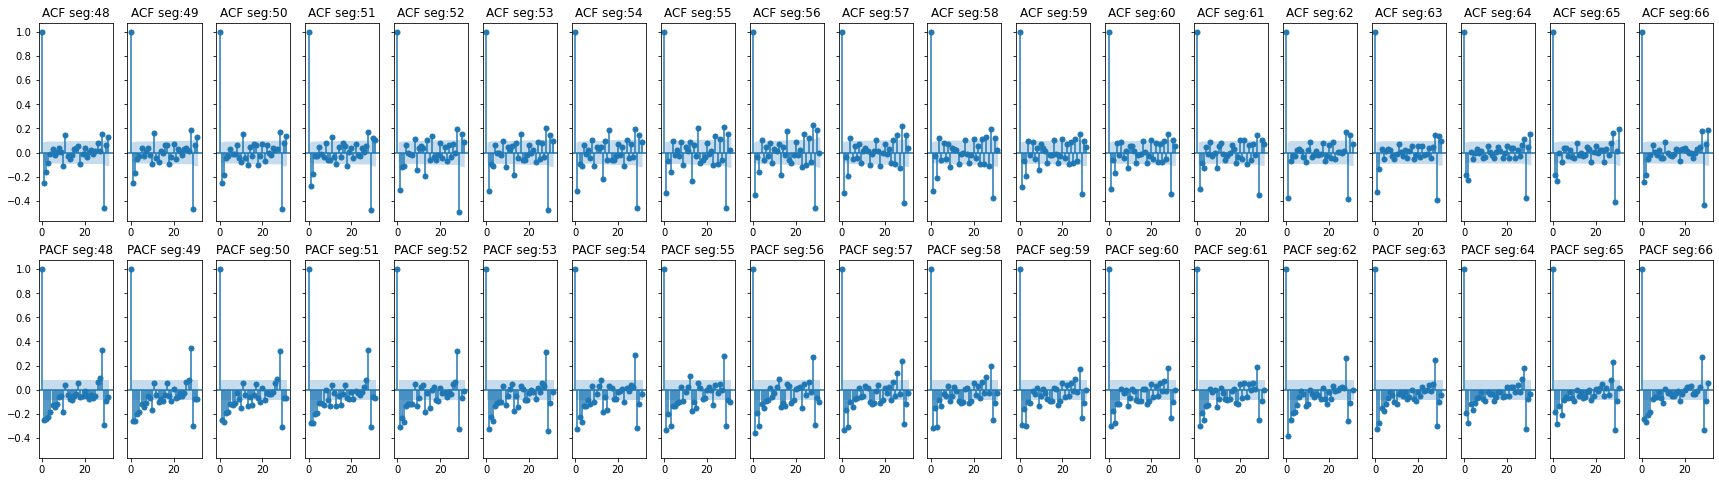

In [27]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff(29).diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff(29).diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

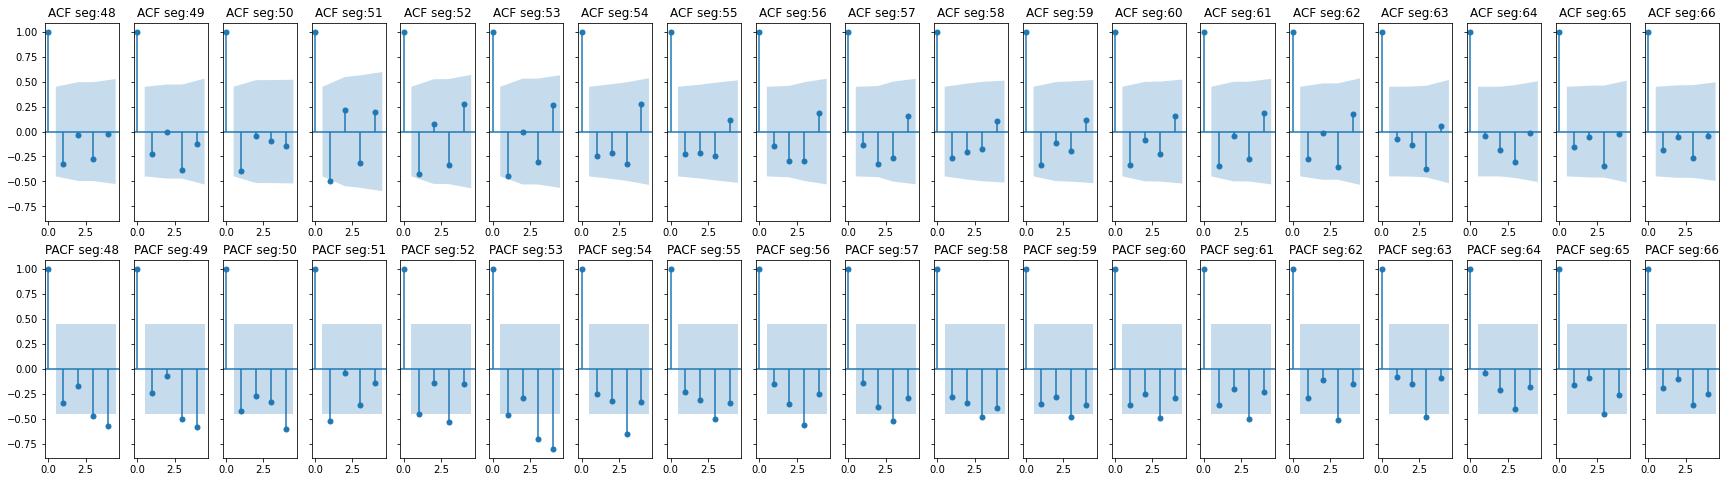

In [28]:
lags=np.arange(0,len(aug_data.iloc[::29,0])/4,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data.iloc[::29,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data.iloc[::29,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");



# fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
# for i, ax in enumerate(axes[0]):
#     sm.graphics.tsa.plot_acf(aux_data.iloc[::29,i], lags=lags, ax=axes[0][i],title=f"ACF segment:{selected_segment_id[i]}");
#     sm.graphics.tsa.plot_pacf(aux_data.iloc[::29,i], lags=lags, ax=axes[1][i],title=f"PACF segment:{selected_segment_id[i]}");


In [84]:
def get_arima(series, seasonal_lag, p, d, q, sp, sd, sq):
    
    model = sm.tsa.statespace.SARIMAX(series, order=(p, d, q), seasonal_order=(sp,sd,sq,seasonal_lag), trend="c")
    results = model.fit(maxiter=100)
    return p, d, q, sp, sd, sq, results, model

    
def arima_grid(series, seasonal_lag, arima_coef, seasonal_coef):
    
    out = []
    
    input_p, input_d, input_q = arima_coef
    input_sp, input_sd, input_sq = seasonal_coef
    
    for p in input_p:
        for d in input_d:
            for q in input_q:
                for sp in input_sp:
                    for sd in input_sd:
                        for sq in input_sq:
                            result = get_arima(series, seasonal_lag, p, d, q, sp, sd, sq)
                            result.append(result[-2].aic)
                            result.append(result[-3].bic)
                            out.append(result)
    return out

In [94]:
selected_segment_id

array([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66])

In [ ]:
seasonal_lag = 29
i = 48
p, d, q = 2, 0, 0
sp, sd, sq = 1, 0, 1
results = {}
results["48"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_48"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["49"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_49"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["50"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_50"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["51"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_51"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["52"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_52"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["53"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_53"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["54"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_54"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["55"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_55"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["56"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_56"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["57"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_57"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["58"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_58"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["59"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_59"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["60"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_60"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["61"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_61"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["62"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_62"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["63"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_63"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["64"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_64"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["65"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_65"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["66"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_66"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)

## do not forget to set seasonal_lag in accordanve with time bin

{'fopt': 3.3573689852993964, 'gopt': array([ 1.75680746e-02, -8.44942409e-03,  1.04123485e-02,  1.68173919e-05,
        5.12043385e-04,  9.79134729e-04]), 'fcalls': 882, 'warnflag': 1, 'converged': False, 'iterations': 100}
{'fopt': 3.2105629301328698, 'gopt': array([-2.34546373e-02, -2.85697195e-03, -2.40389295e-03,  2.00130756e-04,
       -3.81611525e-03, -6.11606321e-05]), 'fcalls': 945, 'warnflag': 0, 'converged': True, 'iterations': 94}
{'fopt': 3.07713881706899, 'gopt': array([-4.60606366e-02, -1.25207844e-05,  8.19849477e-04,  5.36967359e-05,
       -5.93947513e-04, -4.20706892e-04]), 'fcalls': 987, 'warnflag': 0, 'converged': True, 'iterations': 97}
{'fopt': 2.962219619588793, 'gopt': array([-3.12778381e-04, -2.13116635e-05, -8.16291923e-05,  3.18949311e-04,
        3.20221449e-04,  1.18225918e-04]), 'fcalls': 518, 'warnflag': 0, 'converged': True, 'iterations': 49}
{'fopt': 2.6849076952866775, 'gopt': array([-0.54719664,  0.0097547 ,  0.0098625 ,  0.00055032,  0.00089512,
    

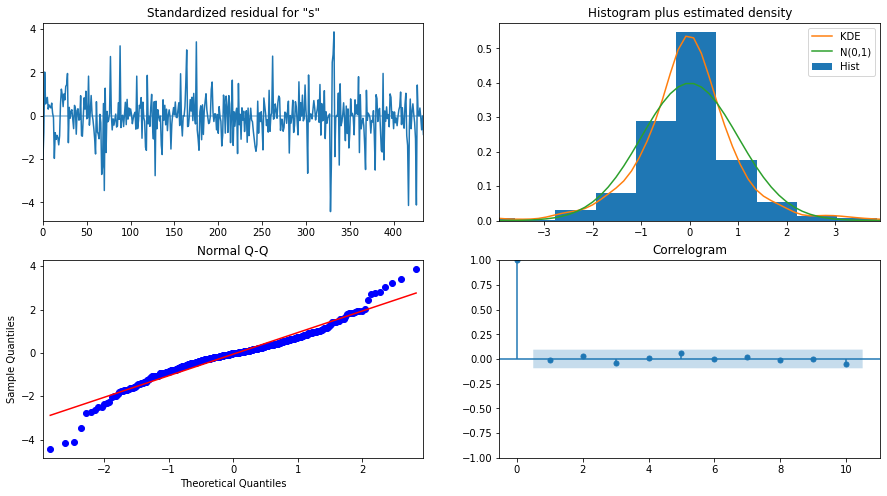

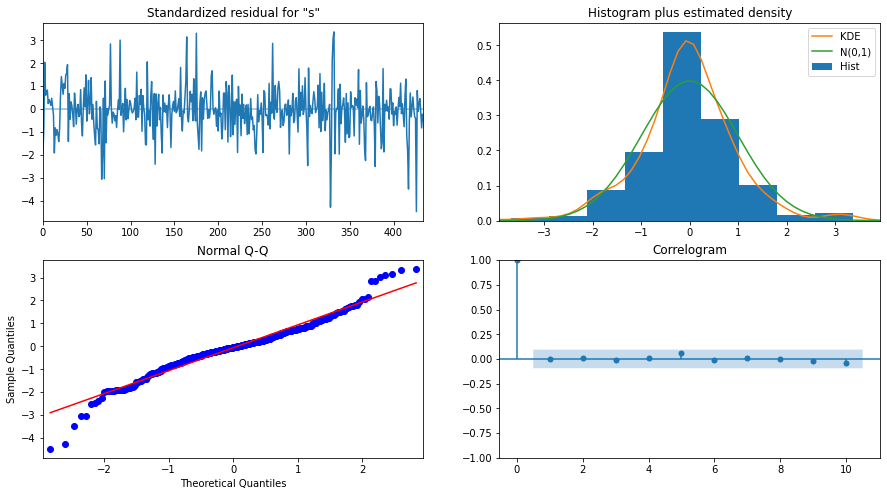

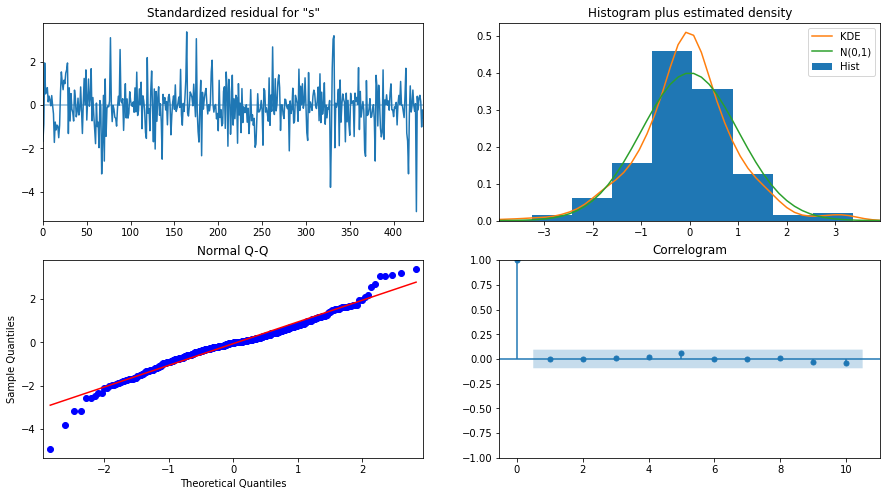

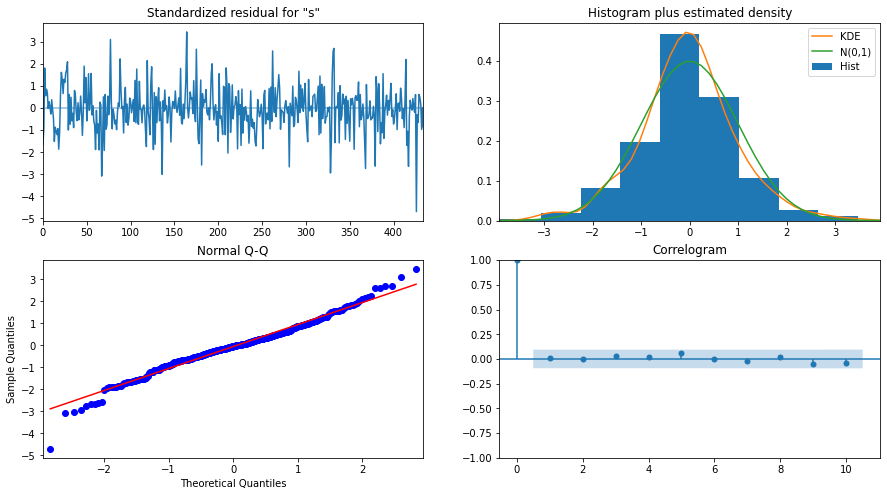

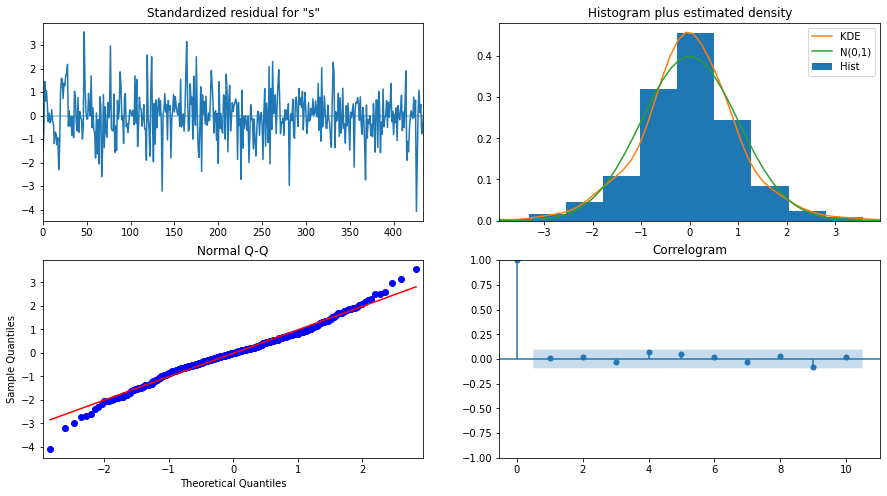

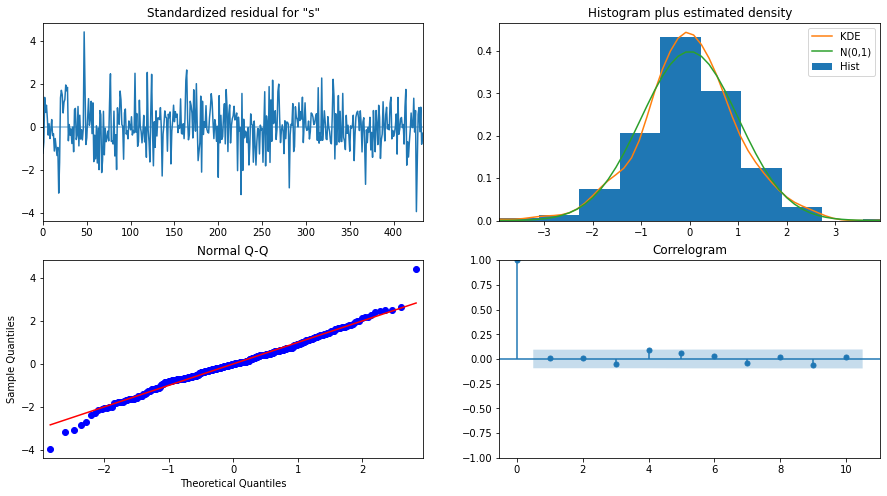

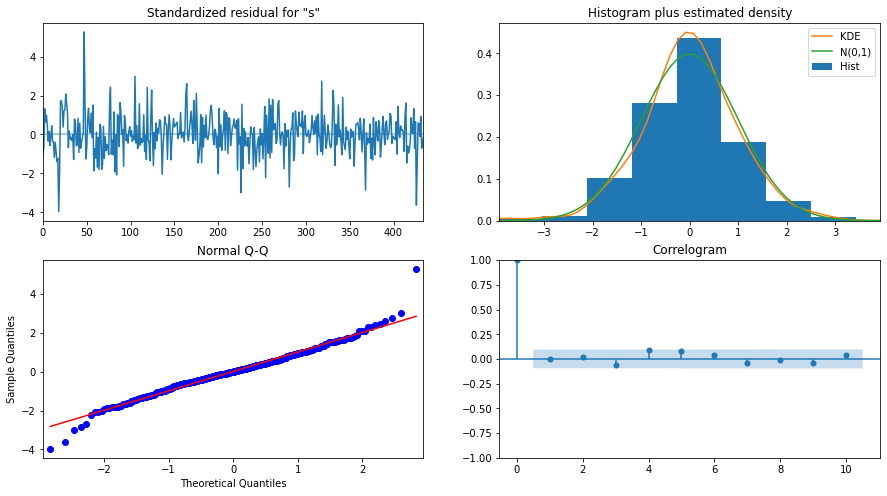

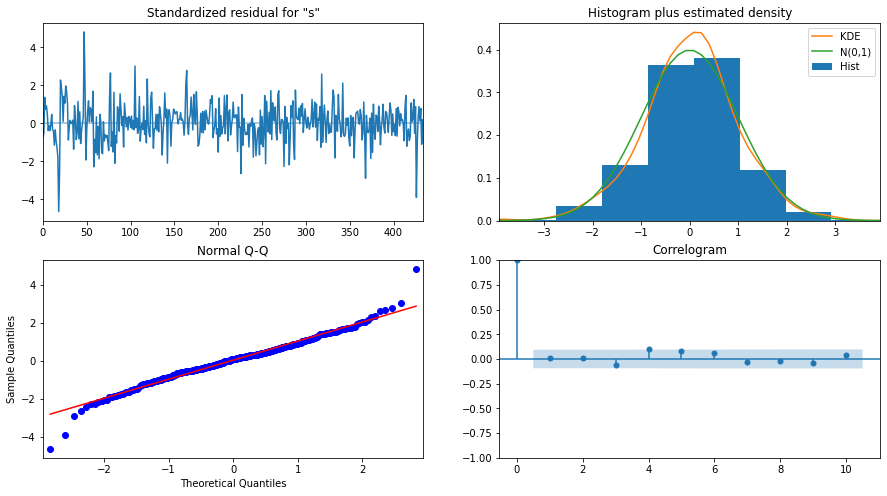

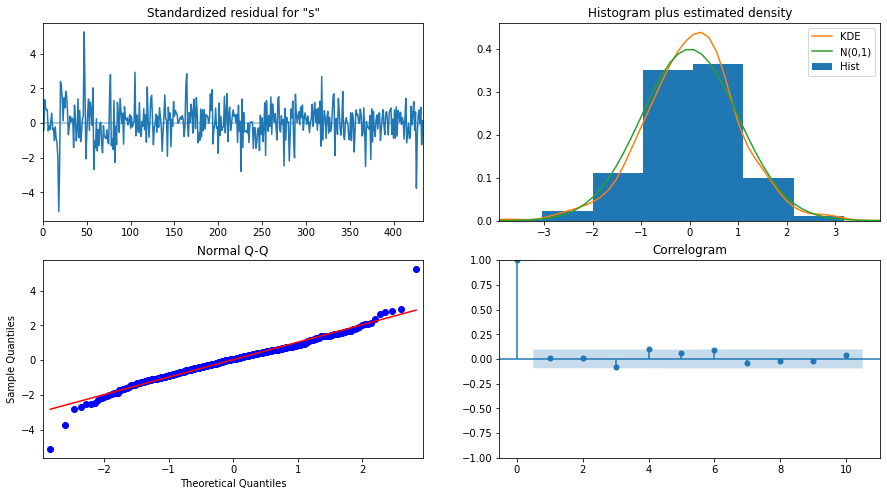

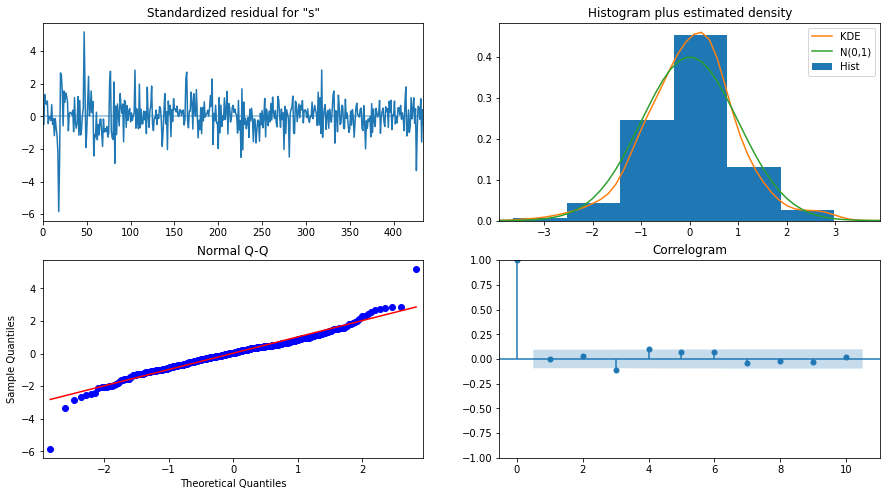

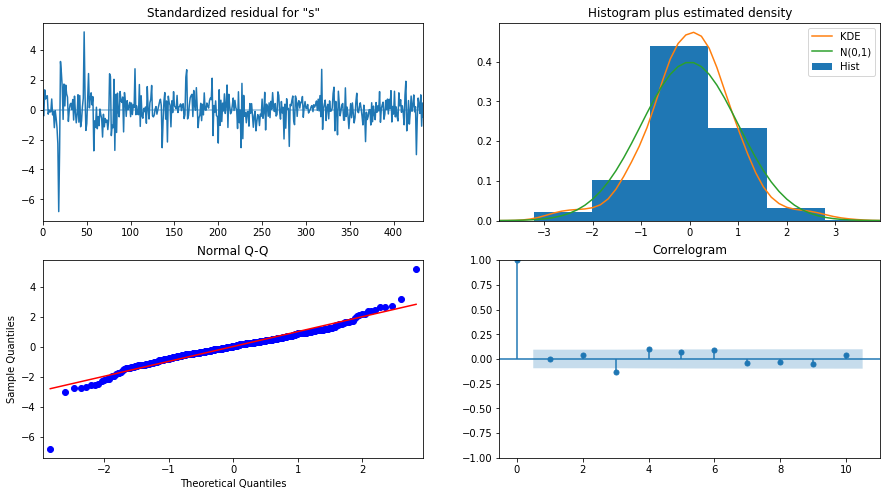

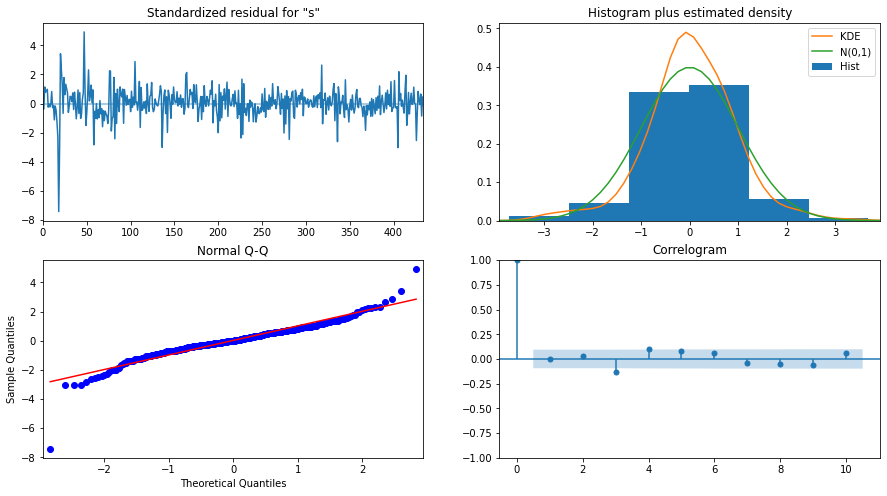

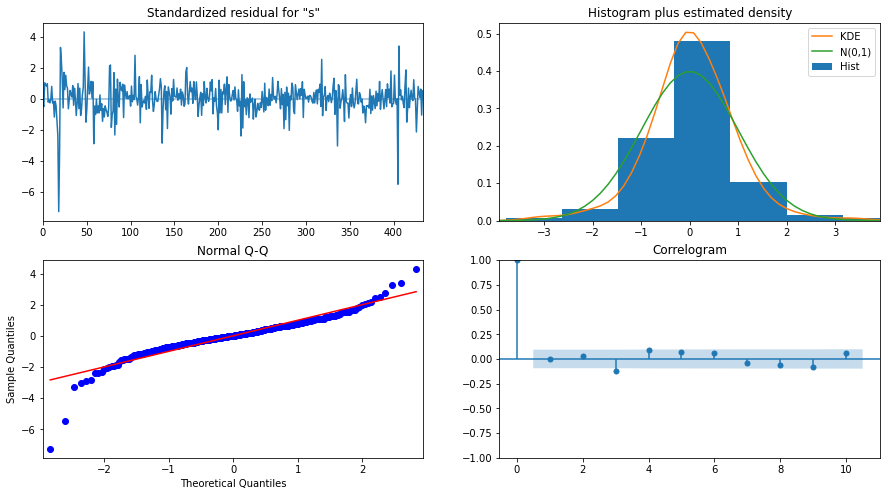

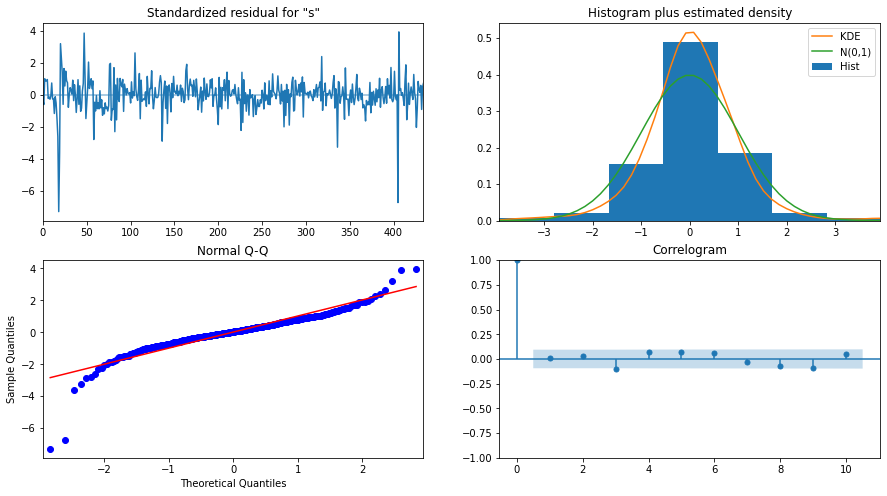

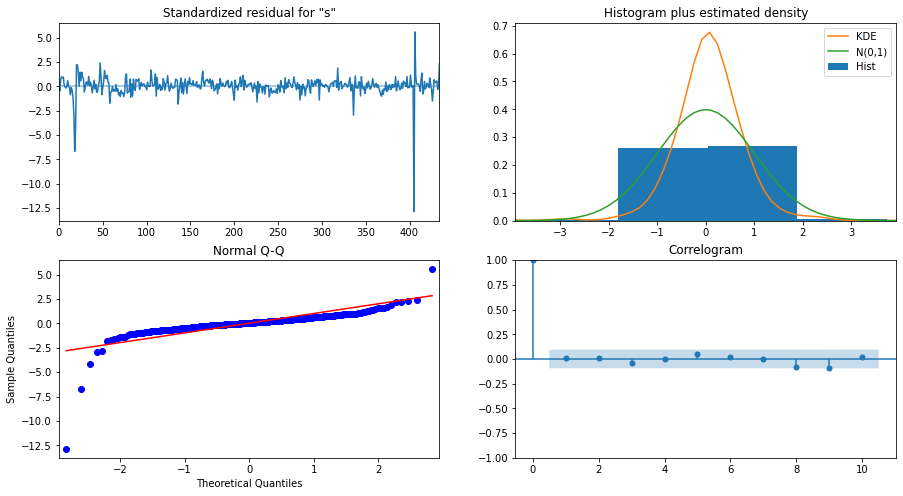

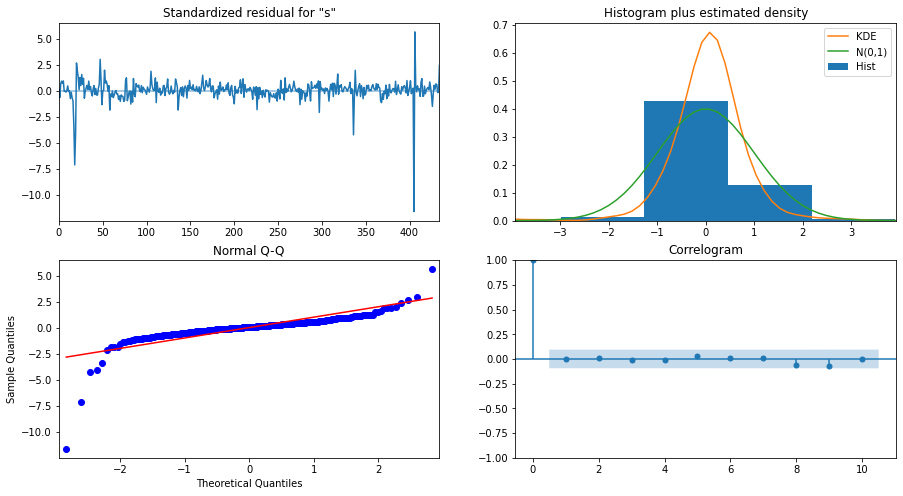

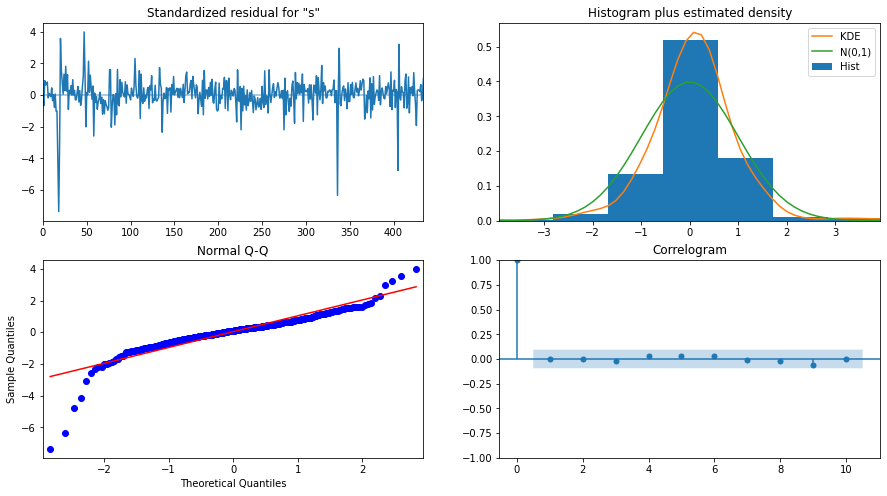

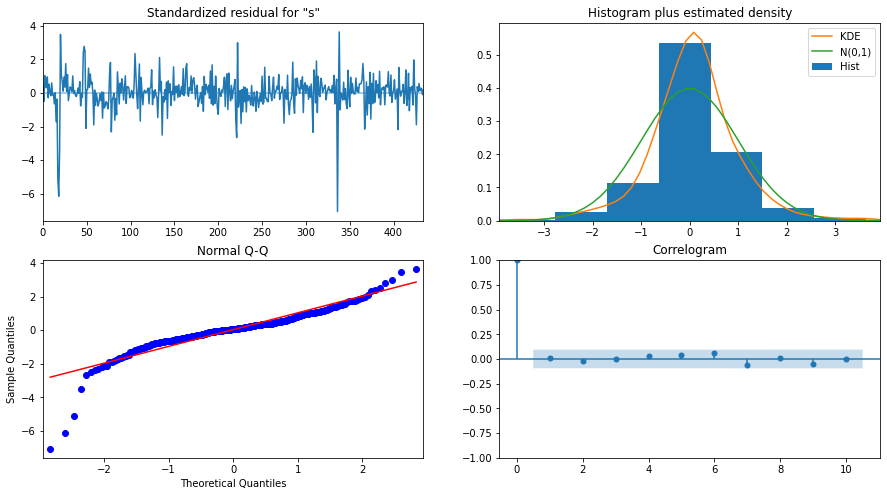

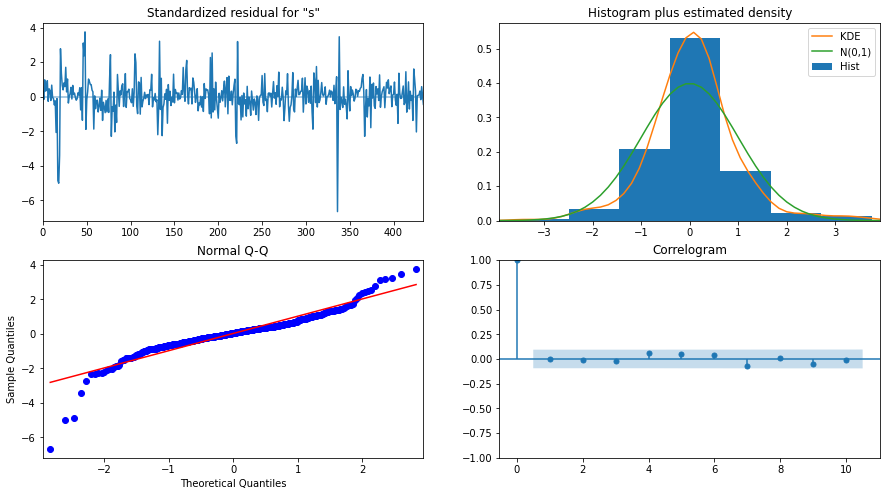

In [97]:
for i in selected_segment_id:
    arima_results = results[f"{i}"][-2]
    model = results[f"{i}"][-1]
    print(arima_results.mle_retvals)
    arima_results.plot_diagnostics(figsize=(15,8));

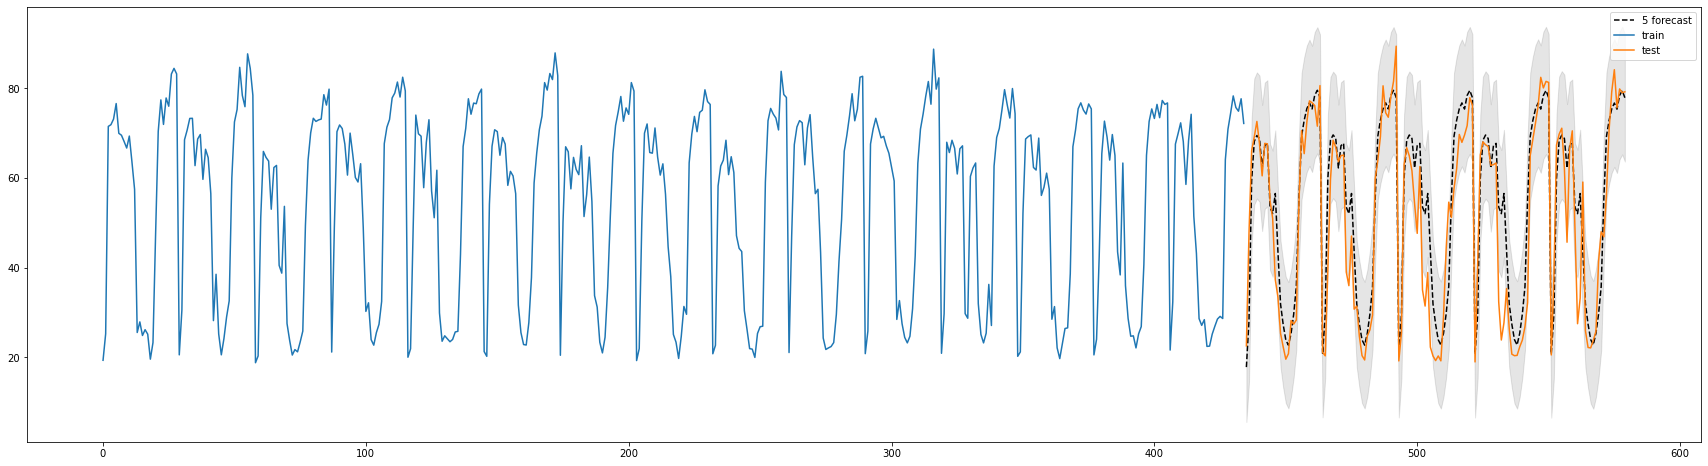

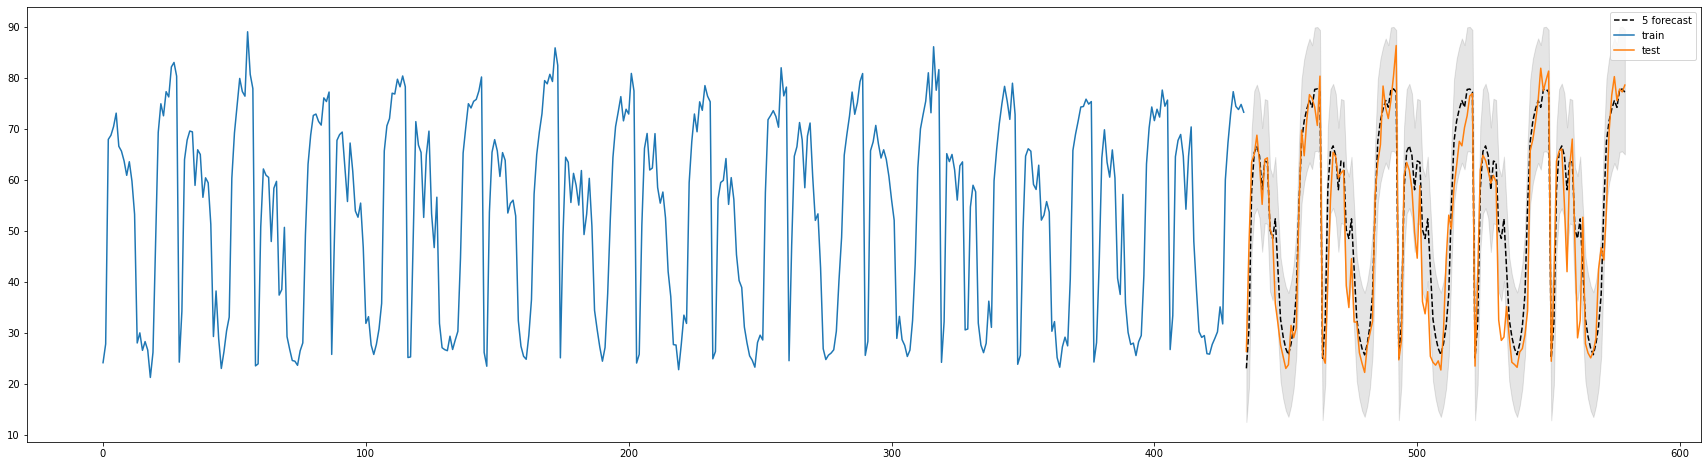

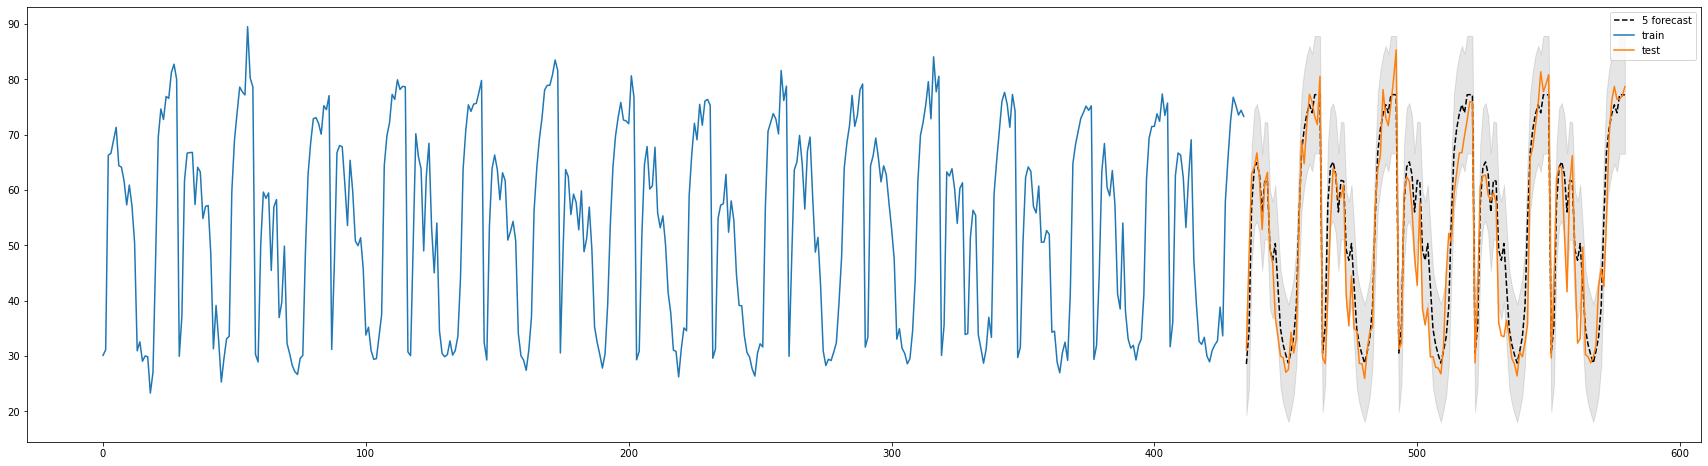

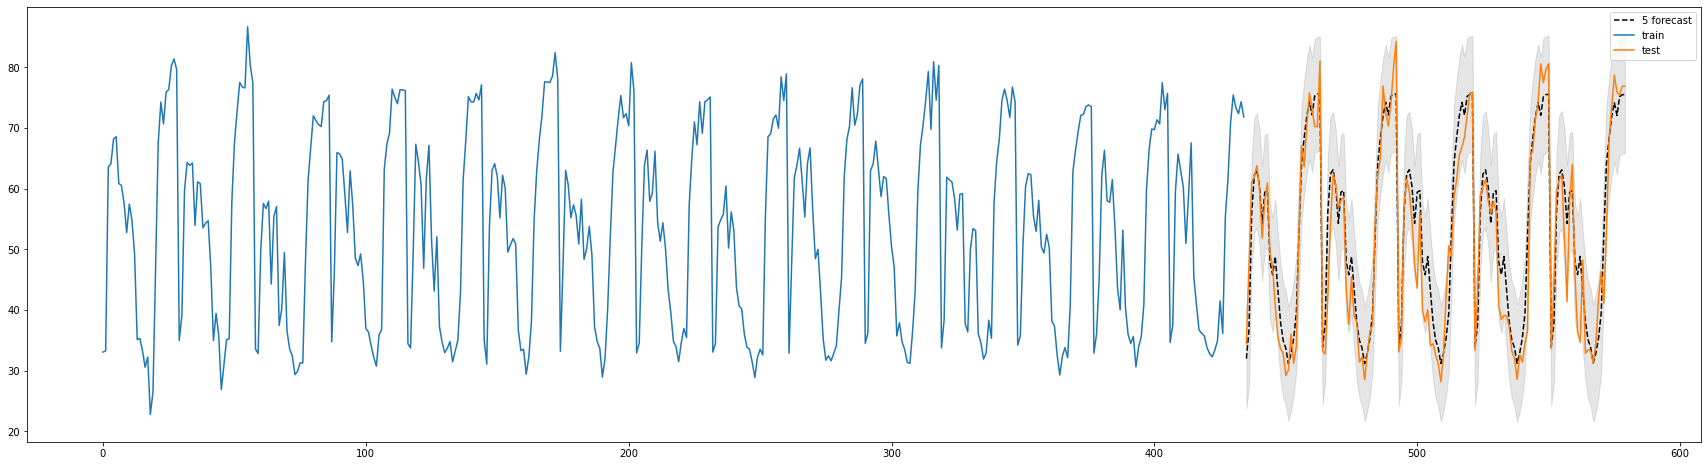

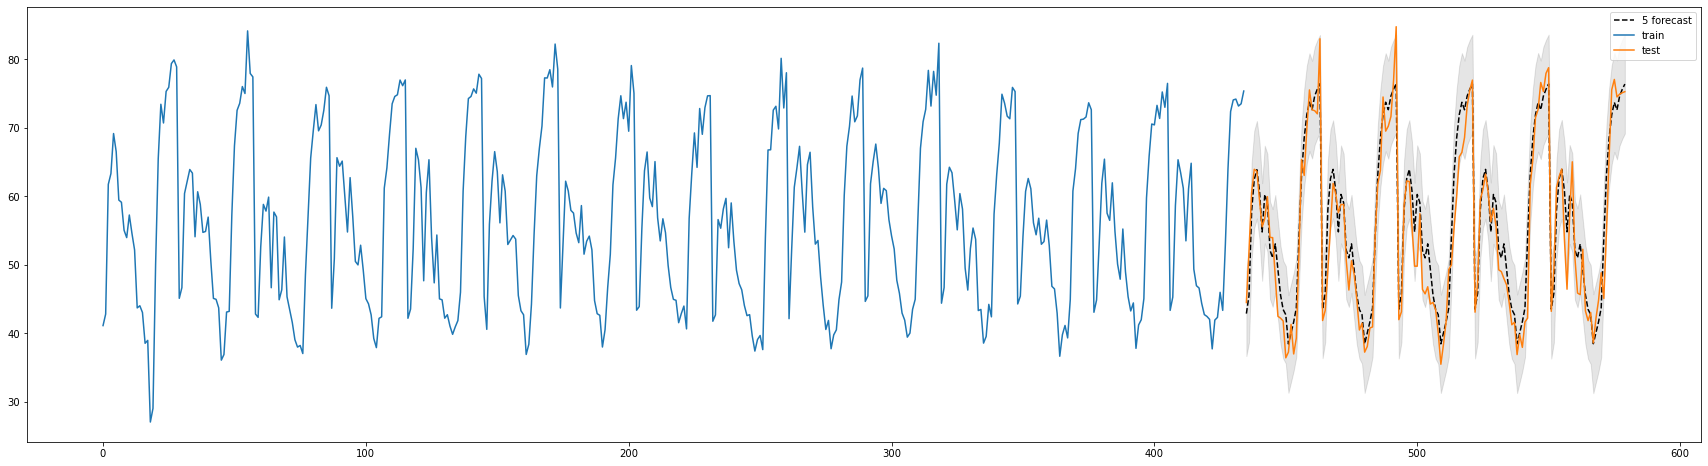

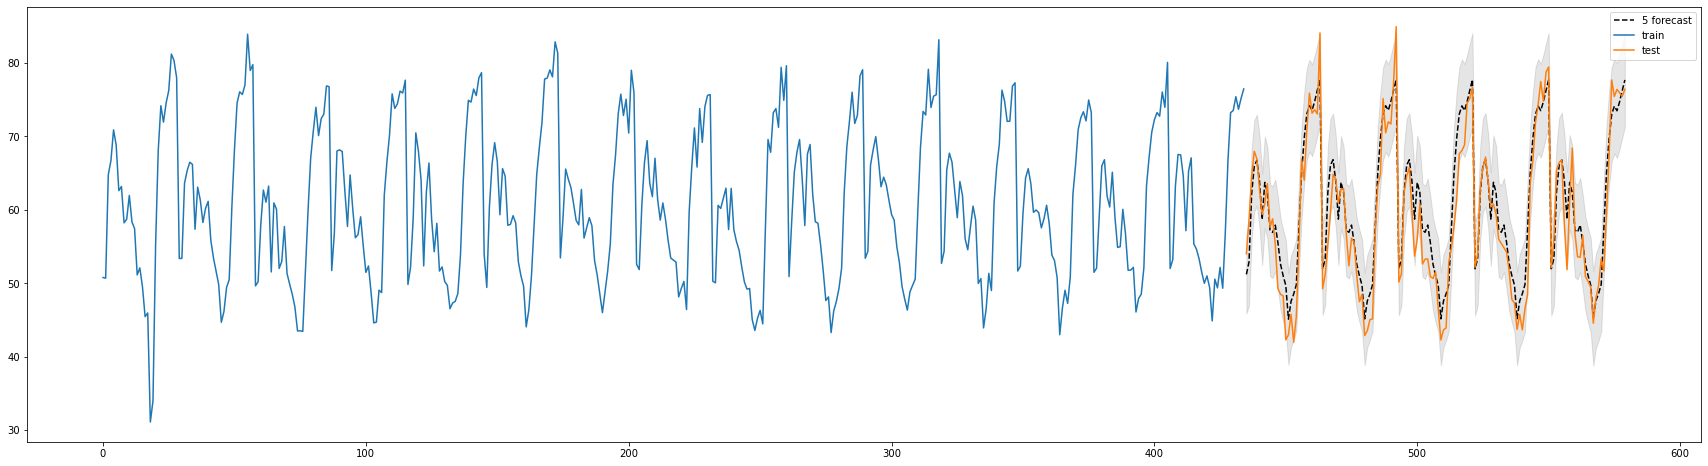

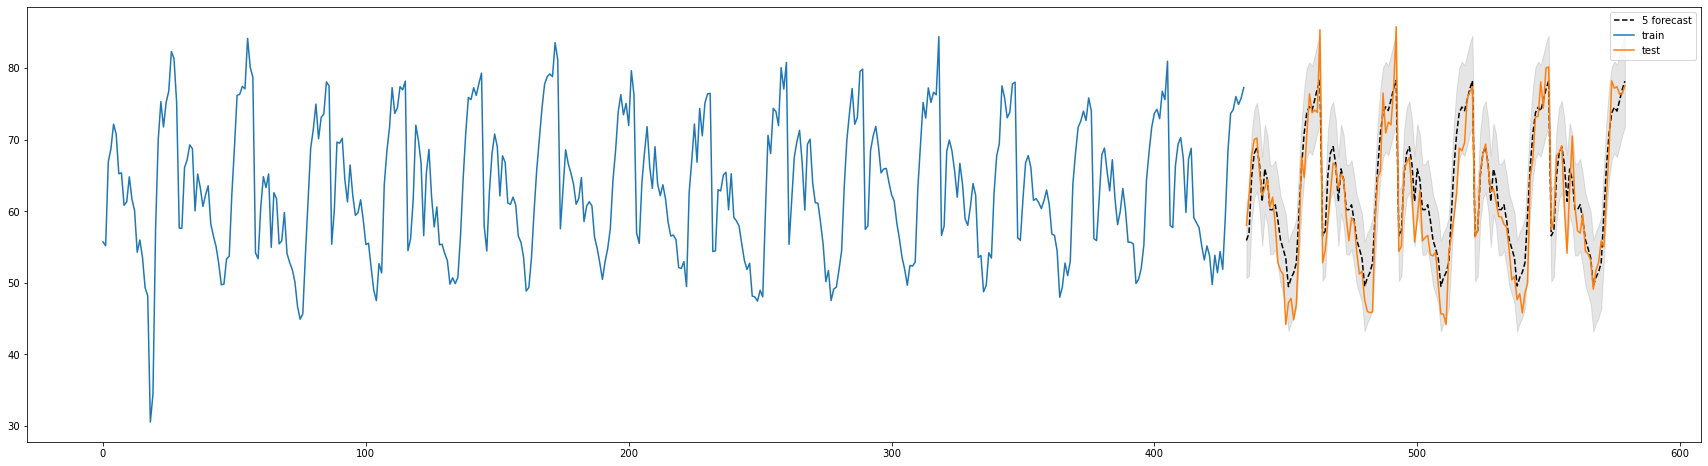

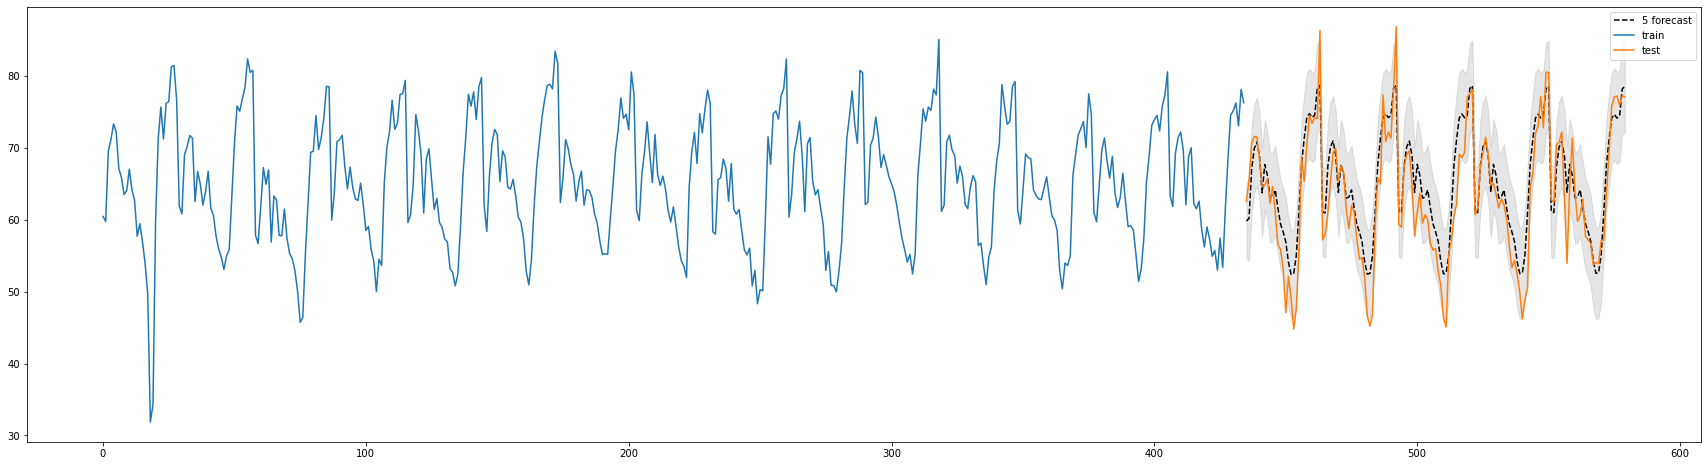

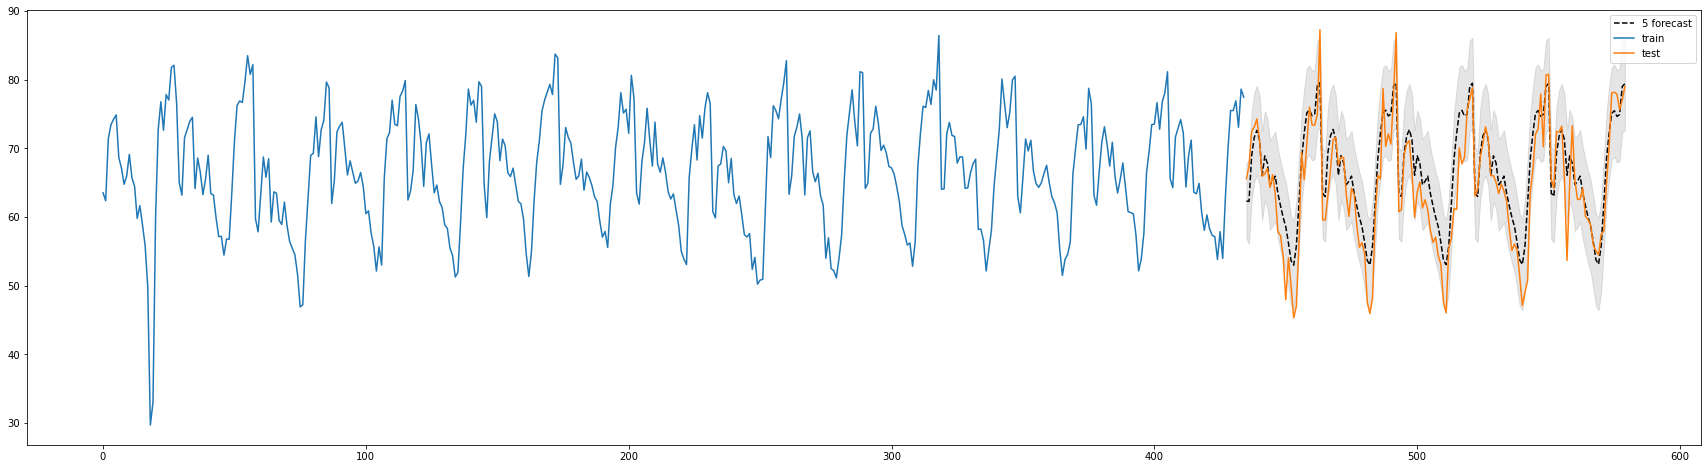

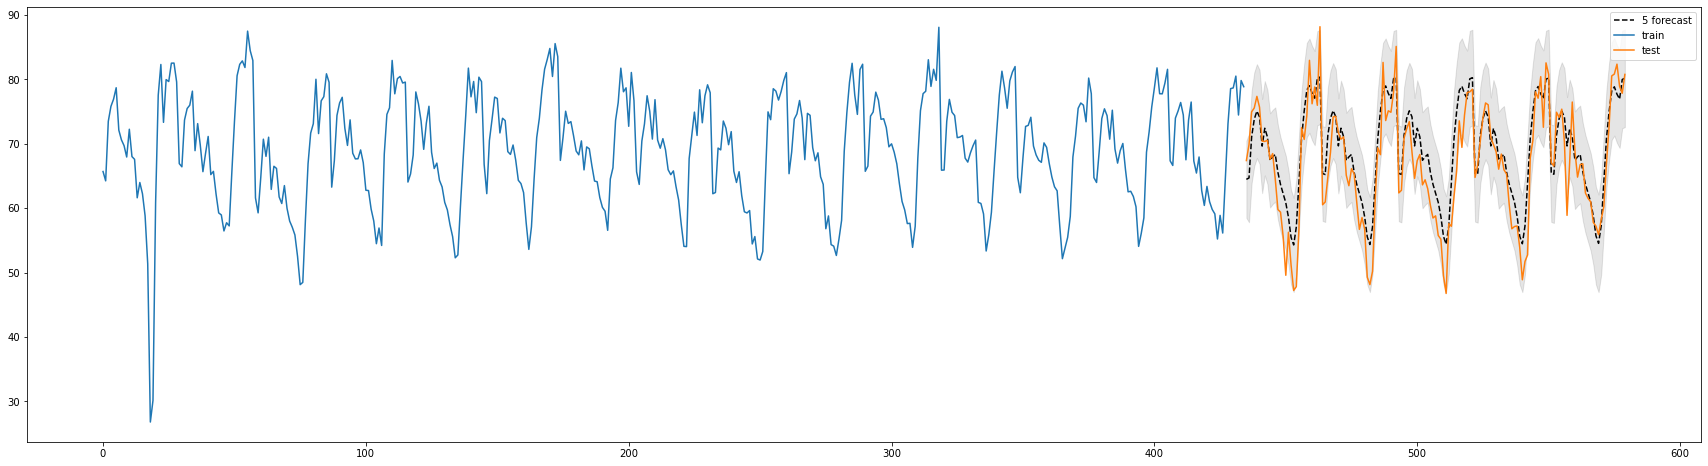

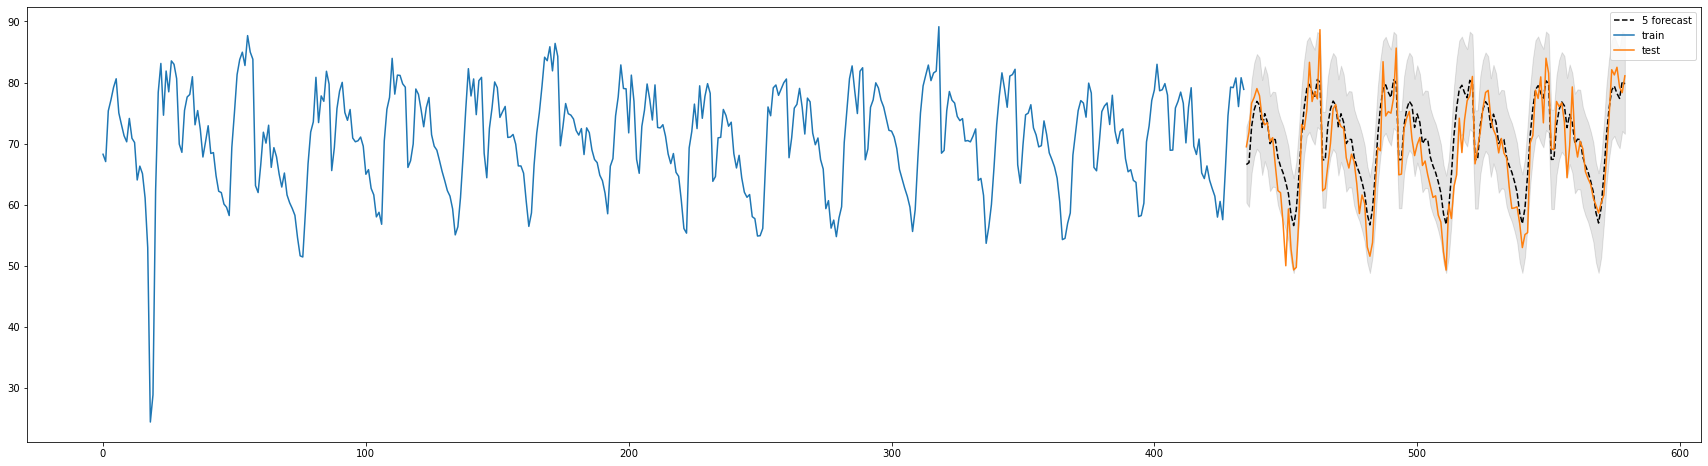

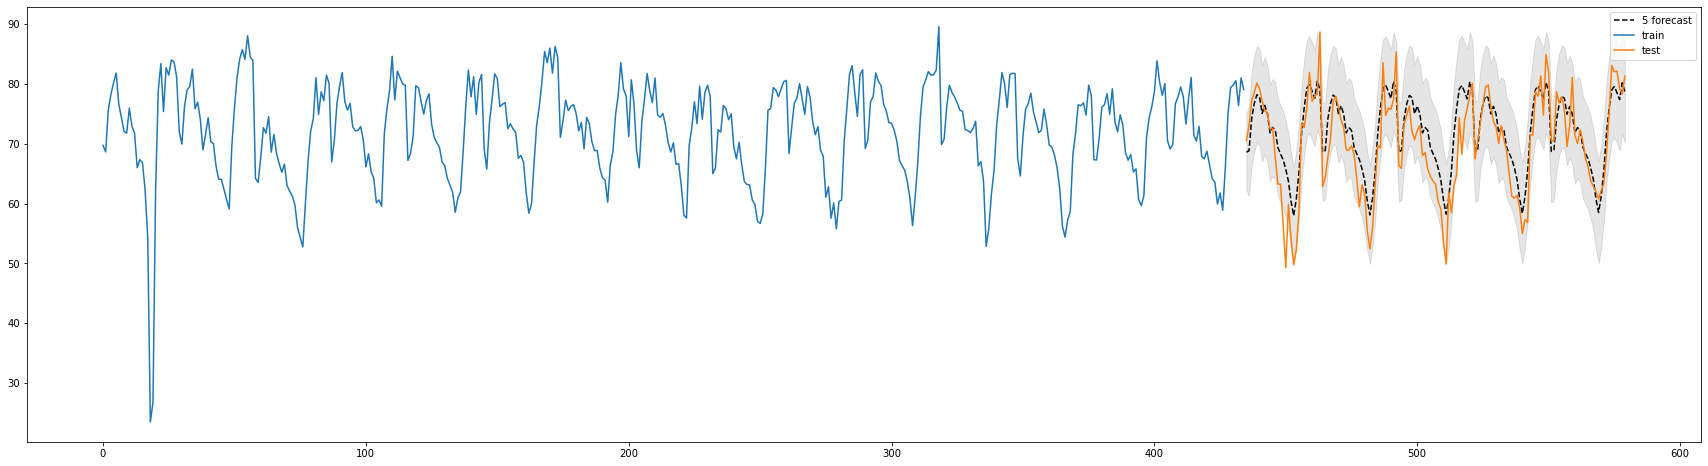

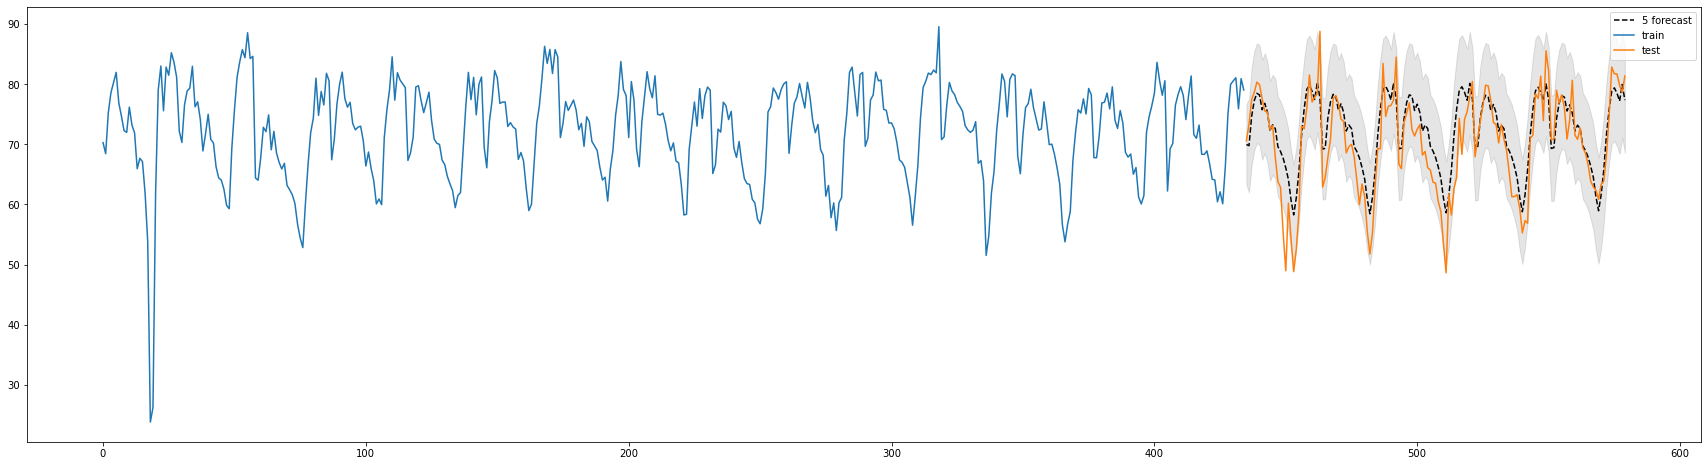

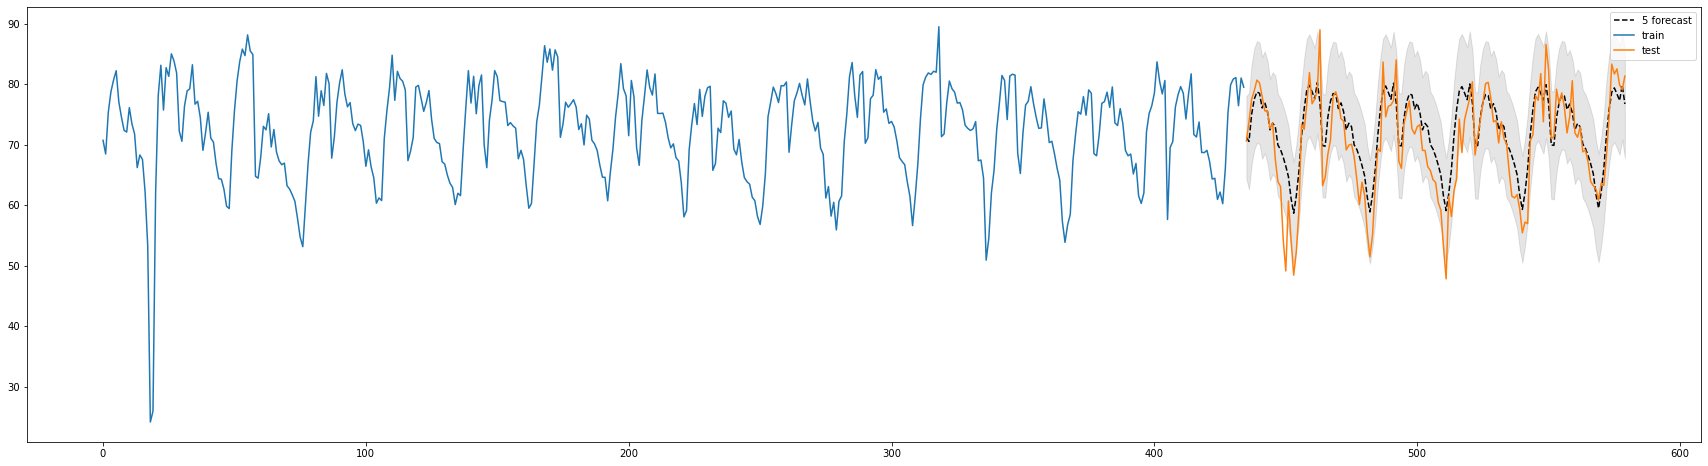

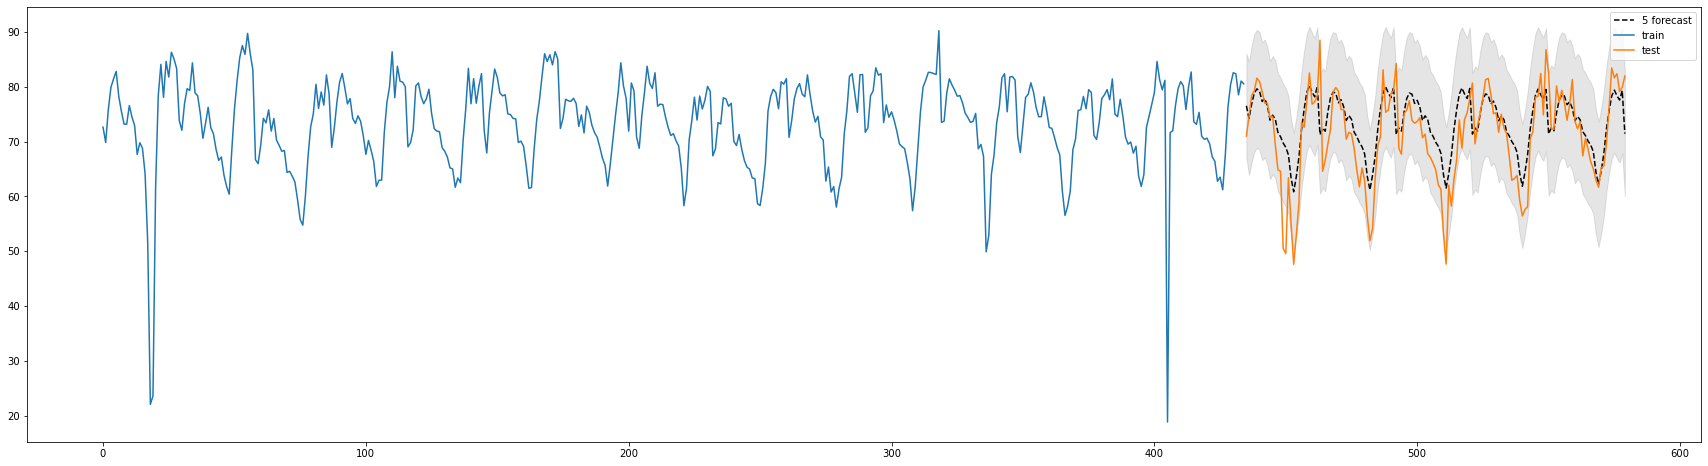

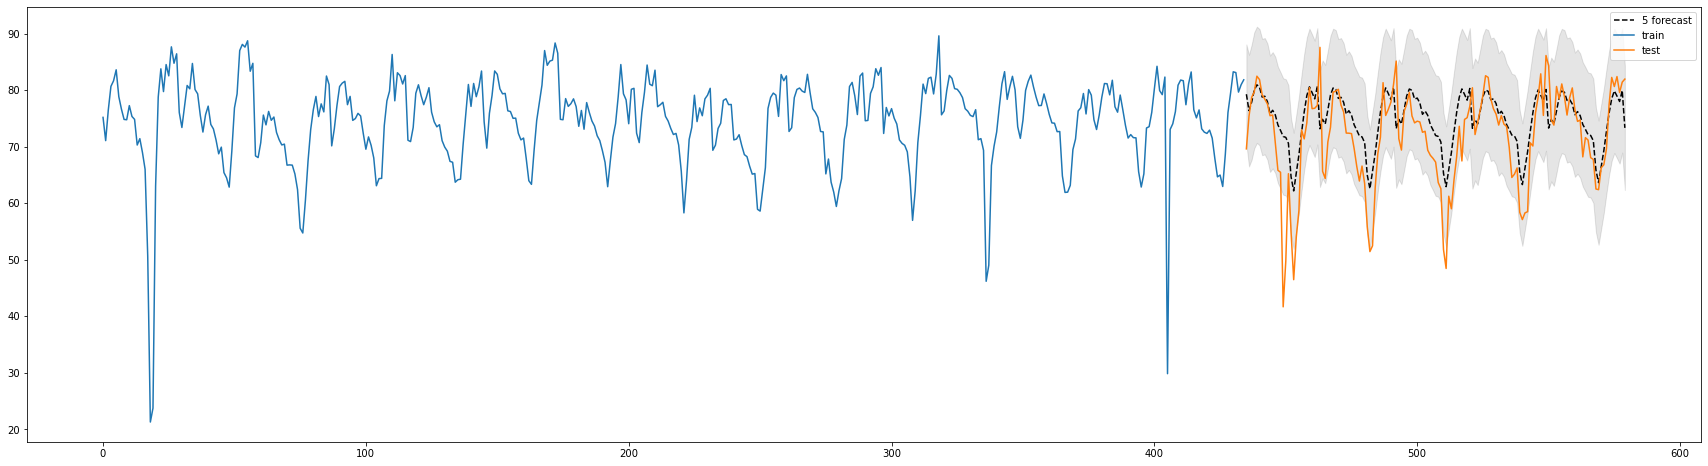

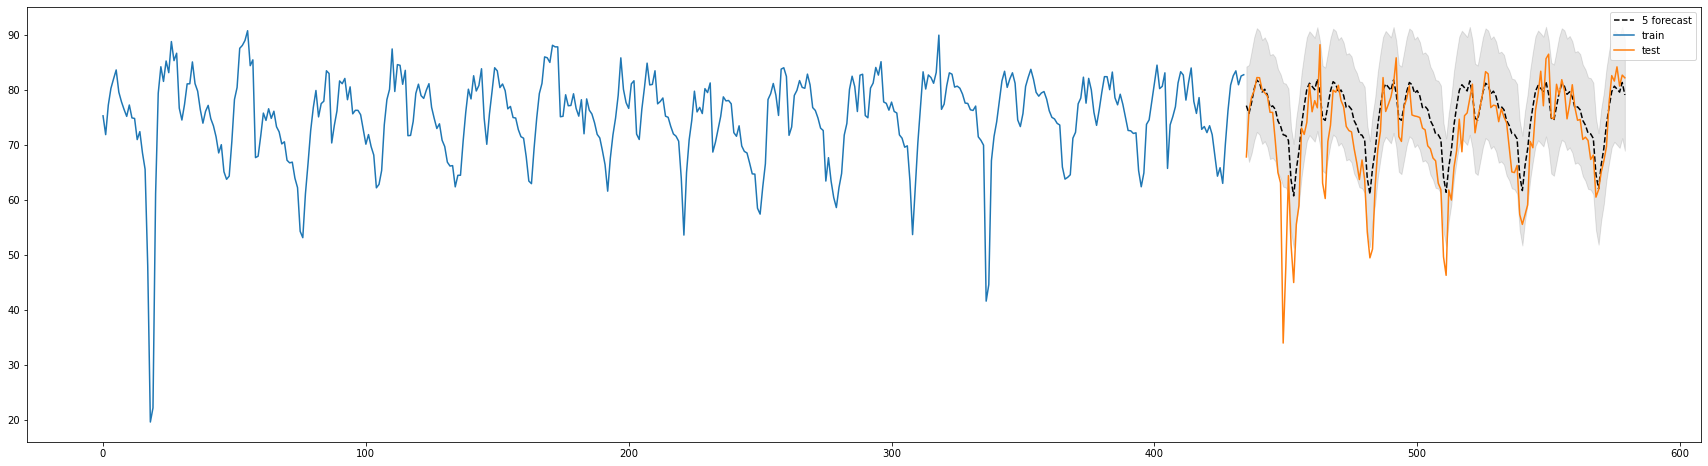

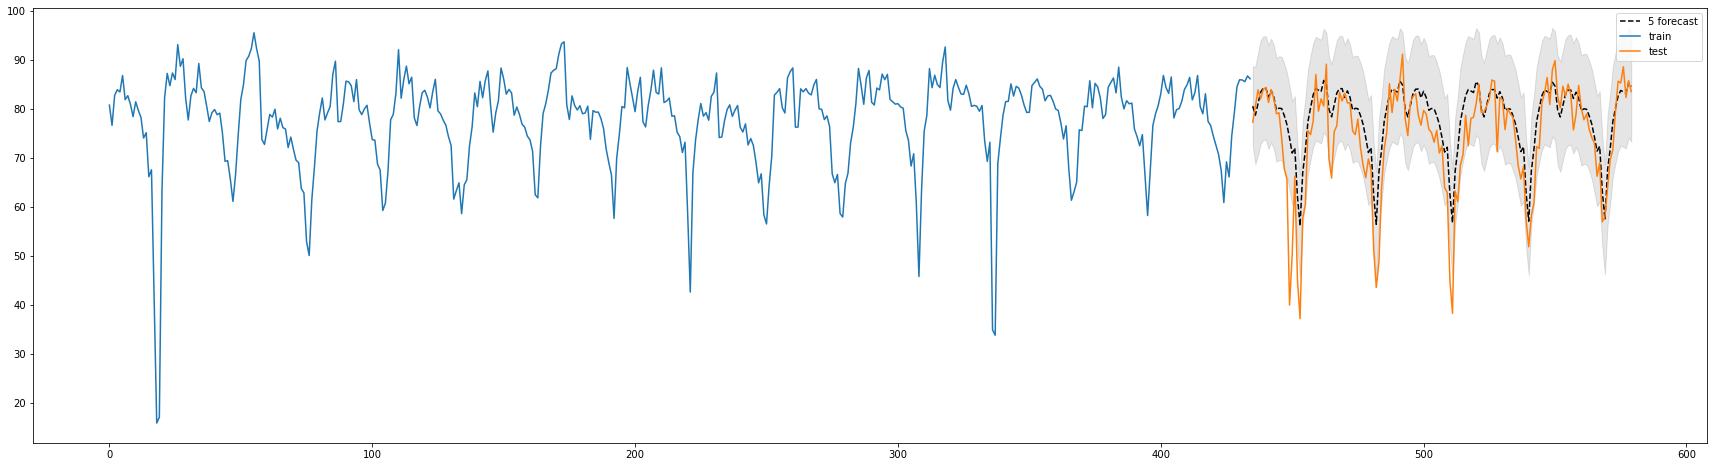

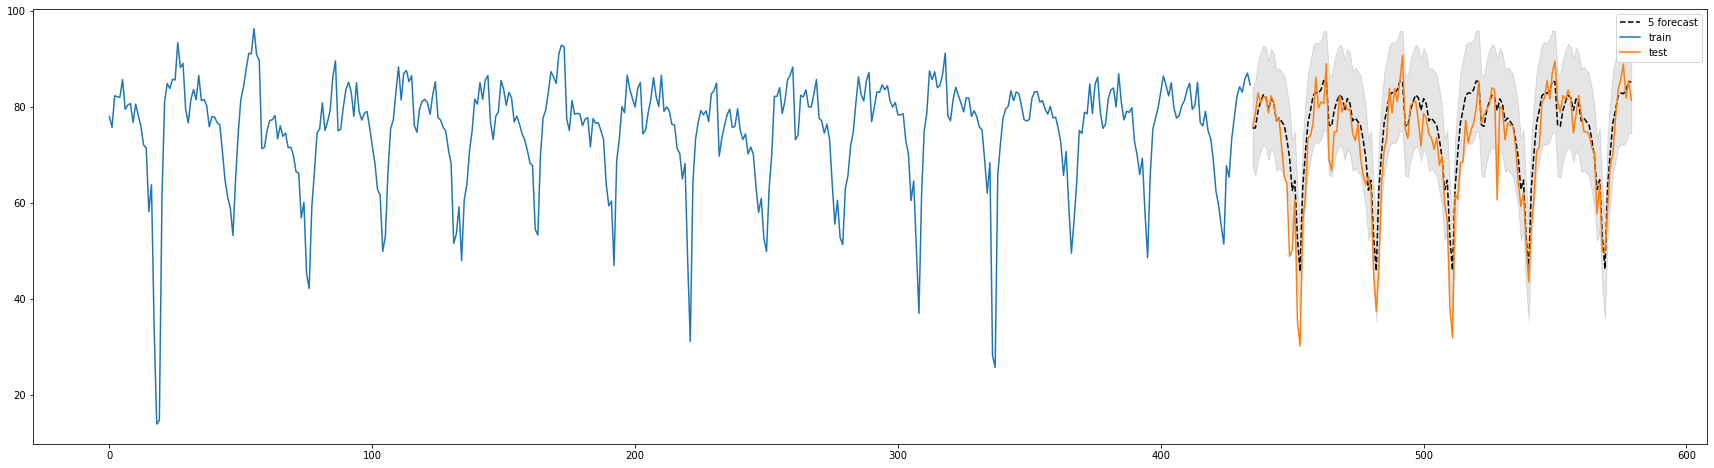

In [98]:
for i in selected_segment_id:    
    fcast_all = results[f"{i}"][-2].get_forecast(seasonal_lag * 5).summary_frame(alpha=0.05)

    fig, ax = plt.subplots(figsize=(30, 8))

    fcast_all['mean'].plot(ax=ax, style='k--', label="5 forecast", legend=True)

    aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{i}", ax=ax, label="train", legend=True);
    aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{i}", ax=ax, label="test",legend=True);
    ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='k', alpha=0.1);

In [127]:
prediction = pd.DataFrame()

for i in selected_segment_id:
    
    fcast = results[f"{i}"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
    segment_prediction = pd.Series(fcast["mean"])
    dyn_arima_results = results[f"{i}"][-2]
    
    for day in range(1,5):
        dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == day), f"segment_{i}"])
        fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
        segment_prediction = segment_prediction.append(fcast["mean"])
    
    
    segment_prediction = segment_prediction.rename(f"segment_{i}")
    
    prediction = pd.concat([prediction, segment_prediction], axis=1)

In [128]:
prediction

segment_48  segment_49  segment_50  segment_51  segment_52  segment_53  \
435   17.828211   23.041930   28.567637   32.004462   42.893754   51.211020   
436   28.187990   31.020636   34.464169   36.756036   45.530497   52.888369   
437   59.344116   57.743850   57.144539   55.717926   57.856634   62.151615   
438   68.147561   65.307955   63.950058   62.204605   62.496037   65.975913   
439   69.492175   66.504170   64.983521   63.023343   63.883468   66.759066   
..          ...         ...         ...         ...         ...         ...   
575   75.835016   74.831076   74.800034   73.338865   72.805933   73.284736   
576   75.464912   74.426416   74.177544   72.624448   72.452986   73.305329   
577   77.840723   76.904474   76.579683   74.567548   74.174667   74.317509   
578   79.156082   77.500736   77.127130   75.988809   75.645252   76.258444   
579   79.106044   78.245721   78.095991   77.465425   77.755018   79.018022   

     segment_54  segment_55  segment_56  segment_57  segment_58  segment_59  \
435   55.930886   59.823922   62.324288   64.475860   66.575381   68.582849   
436   56.906260   60.190980   62.281101   64.688834   66.893037   68.820850   
437   64.822621   67.017922   68.914682   71.059009   72.816518   74.141813   
438   68.066302   69.914641   71.599258   73.815612   75.566146   76.745007   
439   68.992786   70.842671   72.625882   75.065884   76.915304   78.191158   
..          ...         ...         ...         ...         ...         ...   
575   73.414011   73.359726   73.817968   77.267158   77.369322   77.281744   
576   73.837642   73.722617   74.033743   77.260653   77.546504   77.848546   
577   74.872053   74.187593   73.839045   76.374349   76.478747   76.517601   
578   77.077183   78.041501   78.512696   79.508432   79.842327   80.099059   
579   79.736416   80.245288   80.866271   81.204321   81.615489   81.034721   

     segment_60  segment_61  segment_62  segment_63  segment_64  segment_65  \
435   69.978310   71.211487   76.544773   79.268957   77.147462   80.538900   
436   69.784112   70.537219   74.252091   76.372509   75.727336   78.695566   
437   74.648833   75.021254   76.824548   77.849386   77.783223   81.005252   
438   77.282769   77.520846   78.865959   79.967266   80.229204   83.392971   
439   78.500931   78.697376   79.629573   80.937307   81.796334   84.231583   
..          ...         ...         ...         ...         ...         ...   
575   77.009553   76.967738   77.243439   77.085415   77.839669   81.657959   
576   77.894858   77.859841   77.865378   78.437576   79.181001   82.782969   
577   76.262172   76.280709   76.687637   76.804549   78.124722   81.645188   
578   80.103457   80.229291   80.186727   80.394408   81.133118   84.665159   
579   80.526500   80.238308   77.873306   79.281476   82.462238   86.681227   

     segment_66  
435   75.590638  
436   75.590547  
437   79.105332  
438   81.110606  
439   82.479871  
..          ...  
575   81.384267  
576   82.053975  
577   81.937005  
578   84.466091  
579   86.590035  

[145 rows x 19 columns]

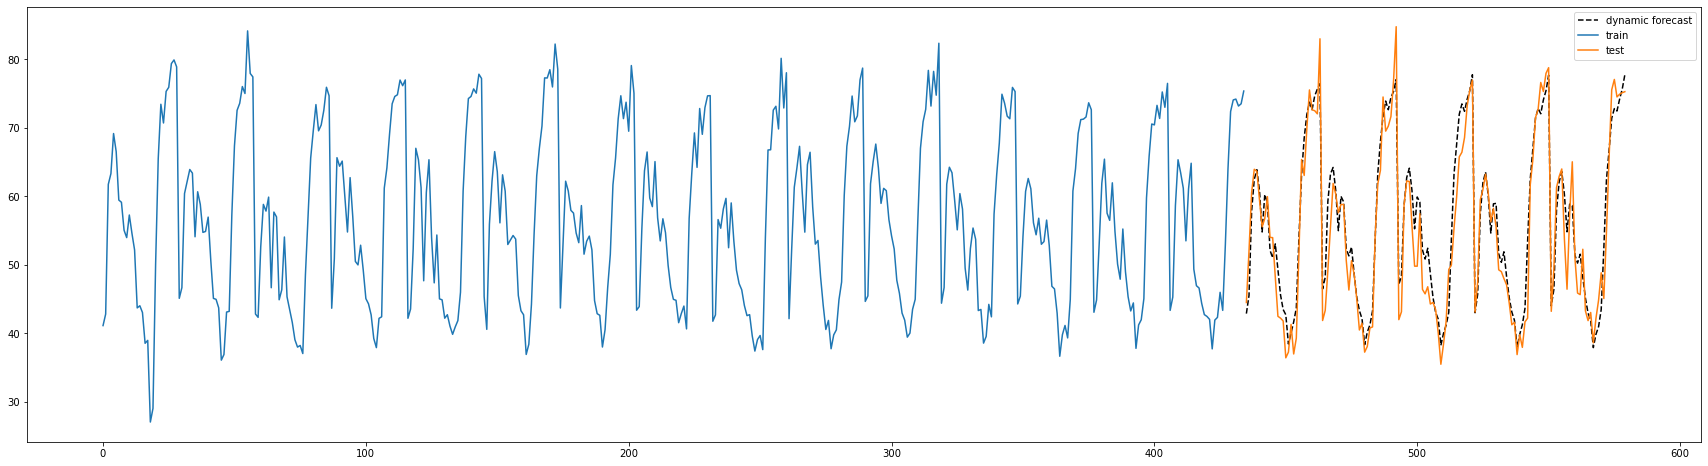

In [129]:
segment_id = 52

fig, ax = plt.subplots(figsize=(30, 8))

prediction.plot(ax=ax, style='k--', label="dynamic forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="test",legend=True);


In [111]:
# # one day forecast
# fcast = results[f"48"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)

# # collect
# prediction = pd.Series(fcast["mean"])

# #plot
# fig, ax = plt.subplots(figsize=(30, 8))
# fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
# aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y="segment_48", ax=ax, label="train", legend=True);
# aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y="segment_48", ax=ax, label="test",legend=True);
# fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
# ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);

# # copy arima result object
# dyn_arima_results = results[f"48"][-2]

# for i in range(1,5):
#     # append true data to arima model to make dynamic forecast
#     dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == i), "segment_48"])
#     # make 1 day forecast
#     fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
#     #collect
#     prediction = prediction.append(fcast["mean"])
    
#     # plot
#     fig, ax = plt.subplots(figsize=(30, 8))
    
#     fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
#     aug_data.iloc[:-seasonal_lag * 5].plot(kind="line",y="segment_48", ax=ax, label="train", legend=True);
#     aug_data.iloc[-seasonal_lag * 5:].plot(kind="line",y="segment_48", ax=ax, label="test",legend=True);
#     fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
#     ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
#     ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);
    
# prediction = prediction.rename("segment_48_forecast")

In [130]:
prediction

segment_48  segment_49  segment_50  segment_51  segment_52  segment_53  \
435   17.828211   23.041930   28.567637   32.004462   42.893754   51.211020   
436   28.187990   31.020636   34.464169   36.756036   45.530497   52.888369   
437   59.344116   57.743850   57.144539   55.717926   57.856634   62.151615   
438   68.147561   65.307955   63.950058   62.204605   62.496037   65.975913   
439   69.492175   66.504170   64.983521   63.023343   63.883468   66.759066   
..          ...         ...         ...         ...         ...         ...   
575   75.835016   74.831076   74.800034   73.338865   72.805933   73.284736   
576   75.464912   74.426416   74.177544   72.624448   72.452986   73.305329   
577   77.840723   76.904474   76.579683   74.567548   74.174667   74.317509   
578   79.156082   77.500736   77.127130   75.988809   75.645252   76.258444   
579   79.106044   78.245721   78.095991   77.465425   77.755018   79.018022   

     segment_54  segment_55  segment_56  segment_57  segment_58  segment_59  \
435   55.930886   59.823922   62.324288   64.475860   66.575381   68.582849   
436   56.906260   60.190980   62.281101   64.688834   66.893037   68.820850   
437   64.822621   67.017922   68.914682   71.059009   72.816518   74.141813   
438   68.066302   69.914641   71.599258   73.815612   75.566146   76.745007   
439   68.992786   70.842671   72.625882   75.065884   76.915304   78.191158   
..          ...         ...         ...         ...         ...         ...   
575   73.414011   73.359726   73.817968   77.267158   77.369322   77.281744   
576   73.837642   73.722617   74.033743   77.260653   77.546504   77.848546   
577   74.872053   74.187593   73.839045   76.374349   76.478747   76.517601   
578   77.077183   78.041501   78.512696   79.508432   79.842327   80.099059   
579   79.736416   80.245288   80.866271   81.204321   81.615489   81.034721   

     segment_60  segment_61  segment_62  segment_63  segment_64  segment_65  \
435   69.978310   71.211487   76.544773   79.268957   77.147462   80.538900   
436   69.784112   70.537219   74.252091   76.372509   75.727336   78.695566   
437   74.648833   75.021254   76.824548   77.849386   77.783223   81.005252   
438   77.282769   77.520846   78.865959   79.967266   80.229204   83.392971   
439   78.500931   78.697376   79.629573   80.937307   81.796334   84.231583   
..          ...         ...         ...         ...         ...         ...   
575   77.009553   76.967738   77.243439   77.085415   77.839669   81.657959   
576   77.894858   77.859841   77.865378   78.437576   79.181001   82.782969   
577   76.262172   76.280709   76.687637   76.804549   78.124722   81.645188   
578   80.103457   80.229291   80.186727   80.394408   81.133118   84.665159   
579   80.526500   80.238308   77.873306   79.281476   82.462238   86.681227   

     segment_66  
435   75.590638  
436   75.590547  
437   79.105332  
438   81.110606  
439   82.479871  
..          ...  
575   81.384267  
576   82.053975  
577   81.937005  
578   84.466091  
579   86.590035  

[145 rows x 19 columns]

In [133]:
true = aug_data.iloc[-seasonal_lag * 5:,1:]
true

segment_48  segment_49  segment_50  segment_51  segment_52  segment_53  \
435   22.573927   26.356101   31.139522   34.434552   44.506163   54.005243   
436   47.777332   47.265460   47.781766   47.892957   52.018804   58.631095   
437   66.054386   63.435786   62.928759   61.017871   60.565213   64.522995   
438   69.180647   64.978207   64.007960   61.971563   63.950873   67.985160   
439   72.622090   68.718193   66.723735   63.789085   63.647952   66.950474   
..          ...         ...         ...         ...         ...         ...   
575   84.162421   80.192593   78.719565   78.709039   77.057090   75.444588   
576   75.661733   75.484176   76.395440   75.915036   74.508321   76.420908   
577   79.870487   77.753289   76.461413   75.365525   74.904206   75.941199   
578   79.027712   77.193817   77.003997   76.883484   75.113299   75.476309   
579   79.238255   78.537212   78.675006   76.914746   75.273518   76.429740   

     segment_54  segment_55  segment_56  segment_57  segment_58  segment_59  \
435   58.034570   62.557770   65.574310   67.393593   69.486623   70.493840   
436   62.002910   65.458168   67.410366   69.857698   71.899092   72.981547   
437   67.790879   70.603989   72.503160   74.957882   76.624355   77.202556   
438   70.042749   71.605112   73.107606   75.560248   77.607128   78.532719   
439   70.238248   71.511915   74.288315   77.355400   79.014870   80.142030   
..          ...         ...         ...         ...         ...         ...   
575   77.198274   77.116022   78.186833   80.825876   81.243138   82.019415   
576   77.412251   77.231879   77.908558   82.357105   82.497367   82.165189   
577   76.336926   75.934329   75.619495   78.896273   79.221602   79.196625   
578   76.419155   77.289385   77.061205   77.844394   78.350901   78.316089   
579   77.547643   77.118512   78.990817   80.765419   81.103432   81.296998   

     segment_60  segment_61  segment_62  segment_63  segment_64  segment_65  \
435   70.587358   70.615373   71.004780   69.604738   67.815033   77.271208   
436   73.382231   73.828130   74.589914   75.386610   76.214316   80.499921   
437   77.448840   77.513881   78.428683   78.711177   78.725610   83.868220   
438   78.652984   78.899460   79.215484   79.678206   79.839979   82.023222   
439   80.362561   80.676659   81.585791   82.460127   82.253333   83.960001   
..          ...         ...         ...         ...         ...         ...   
575   81.737542   81.679846   81.647514   80.627379   81.607526   85.272868   
576   81.716097   82.527006   82.398723   82.391536   84.198091   88.593951   
577   79.815084   79.867805   79.127694   79.569486   80.711156   82.313341   
578   78.618838   79.075224   79.911215   81.412374   82.699151   85.758215   
579   81.375780   81.323408   81.973695   81.945631   82.201067   83.523580   

     segment_66  
435   75.953313  
436   78.564569  
437   82.894698  
438   80.783477  
439   82.002600  
..          ...  
575   85.646973  
576   88.890822  
577   81.856099  
578   85.430788  
579   81.336399  

[145 rows x 19 columns]

In [125]:
# pd.concat([prediction, true], axis=1)

segment_48_forecast  segment_49_forecast  segment_50_forecast  \
435            17.828211            23.041930            28.567637   
436            28.187990            31.020636            34.464169   
437            59.344116            57.743850            57.144539   
438            68.147561            65.307955            63.950058   
439            69.492175            66.504170            64.983521   
..                   ...                  ...                  ...   
575            75.835016            74.831076            74.800034   
576            75.464912            74.426416            74.177544   
577            77.840723            76.904474            76.579683   
578            79.156082            77.500736            77.127130   
579            79.106044            78.245721            78.095991   

     segment_51_forecast  segment_52_forecast  segment_53_forecast  \
435            32.004462            42.893754            51.211020   
436            36.756036            45.530497            52.888369   
437            55.717926            57.856634            62.151615   
438            62.204605            62.496037            65.975913   
439            63.023343            63.883468            66.759066   
..                   ...                  ...                  ...   
575            73.338865            72.805933            73.284736   
576            72.624448            72.452986            73.305329   
577            74.567548            74.174667            74.317509   
578            75.988809            75.645252            76.258444   
579            77.465425            77.755018            79.018022   

     segment_54_forecast  segment_55_forecast  segment_56_forecast  \
435            55.930886            59.823922            62.324288   
436            56.906260            60.190980            62.281101   
437            64.822621            67.017922            68.914682   
438            68.066302            69.914641            71.599258   
439            68.992786            70.842671            72.625882   
..                   ...                  ...                  ...   
575            73.414011            73.359726            73.817968   
576            73.837642            73.722617            74.033743   
577            74.872053            74.187593            73.839045   
578            77.077183            78.041501            78.512696   
579            79.736416            80.245288            80.866271   

     segment_57_forecast  ...  segment_57  segment_58  segment_59  segment_60  \
435            64.475860  ...   67.393593   69.486623   70.493840   70.587358   
436            64.688834  ...   69.857698   71.899092   72.981547   73.382231   
437            71.059009  ...   74.957882   76.624355   77.202556   77.448840   
438            73.815612  ...   75.560248   77.607128   78.532719   78.652984   
439            75.065884  ...   77.355400   79.014870   80.142030   80.362561   
..                   ...  ...         ...         ...         ...         ...   
575            77.267158  ...   80.825876   81.243138   82.019415   81.737542   
576            77.260653  ...   82.357105   82.497367   82.165189   81.716097   
577            76.374349  ...   78.896273   79.221602   79.196625   79.815084   
578            79.508432  ...   77.844394   78.350901   78.316089   78.618838   
579            81.204321  ...   80.765419   81.103432   81.296998   81.375780   

     segment_61  segment_62  segment_63  segment_64  segment_65  segment_66  
435   70.615373   71.004780   69.604738   67.815033   77.271208   75.953313  
436   73.828130   74.589914   75.386610   76.214316   80.499921   78.564569  
437   77.513881   78.428683   78.711177   78.725610   83.868220   82.894698  
438   78.899460   79.215484   79.678206   79.839979   82.023222   80.783477  
439   80.676659   81.585791   82.460127   82.253333   83.960001   82.002600  
..          ...         ...         ...  

In [145]:
error_df = pd.DataFrame(((true - prediction)/true).abs().mean())
error_df.columns = ["mape"]
error_df["rmse"] = np.sqrt((((true - prediction) ** 2).mean()))
error_df


mape      rmse
segment_48  0.165160  8.630853
segment_49  0.134006  7.320089
segment_50  0.106729  6.253821
segment_51  0.083393  5.053448
segment_52  0.055847  3.771786
segment_53  0.047373  3.373397
segment_54  0.047443  3.512766
segment_55  0.049812  3.740888
segment_56  0.052017  3.996996
segment_57  0.051135  4.036653
segment_58  0.049432  4.111989
segment_59  0.049377  4.255890
segment_60  0.050141  4.402303
segment_61  0.051234  4.536017
segment_62  0.055571  5.109083
segment_63  0.060811  5.740361
segment_64  0.065905  6.239976
segment_65  0.067934  6.269141
segment_66  0.064473  5.446262

In [49]:
# fig, ax = plt.subplots(figsize=(30, 8))
# dyn_arima_results.fittedvalues.iloc[-seasonal_lag * 5:].plot(ax=ax, style='k--', label="dynamic forecast day-by-day", legend=True)
# aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
# aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);


    

In [51]:
# dyn_arima_results.model.data.orig_endog